In [2]:
!pip install keras

In [3]:
!pip install tensorflow

With longer sequence length, different model architecture, dropout for regularization, and early stopping

In [4]:
# Import Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [5]:
# Load data (csv)
path = '/content/augmento_btc_returns.xls'
df = pd.read_excel(path)
df.head()

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
0,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
1,2016-11-01 02:00:00,709.99,-0.005636,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2,2016-11-01 03:00:00,708.54,0.002044,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
3,2016-11-01 04:00:00,702.85,0.008063,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
4,2016-11-01 05:00:00,708.50,-0.008007,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
from typing import Tuple

# Load your data
df = pd.read_excel('/content/btc_nov20change0F.xlsx')

# Verify the columns present in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Define the target and features
target = 'ret'
features = ['RMW', 'Mkt-RF', 'drxon', 'log_vol', 'volume', 'spx', 'nasdaq', 'vix',
            'epu', 'gepu', 'nft', 'cbdc_u', 'cbdc_a', 'gt_web', 'gt_news', 'SER',
            'active add', 'over10k', 'over100k', 'over1m', 'over1k', 'mean trans fee',
            'total fee', 'miner rev', 'rev per hash', 'hashrate', 'mean hashrate',
            'blox', 'diffic', 'mean diffic', 'inflows', 'outflows', 'transx', 'transf usd', 'transf']

# Ensure 'Date' column is converted to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'])

# Define the cutoff date for splitting data
cutoff_date = datetime(2023, 1, 1)

# Split the data into training and testing sets
train_data = df[df['Date'] < cutoff_date]
test_data = df[df['Date'] >= cutoff_date]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Check for NaN values in y_train and y_test and handle them
if y_train.isnull().any():
    X_train = X_train[~y_train.isnull()]
    y_train = y_train.dropna()

if y_test.isnull().any():
    X_test = X_test[~y_test.isnull()]
    y_test = y_test.dropna()


Columns in the DataFrame: Index(['Date', 'RealDate', 'DateNumber', 'RMW', 'ret', 'Mkt-RF', 'Unnamed: 6',
       'drxon', 'log_vol', 'volume', 'spx', 'nasdaq', 'vix', 'epu', 'gepu',
       'nft', 'cbdc_u', 'cbdc_a', 'gt_web', 'gt_news', 'SER', 'active add',
       'over10k', 'over100k', 'over1m', 'over1k', 'mean trans fee',
       'total fee', 'miner rev', 'rev per hash', 'hashrate', 'mean hashrate',
       'blox', 'diffic', 'mean diffic', 'inflows', 'outflows', 'transx',
       'transf usd', 'transf'],
      dtype='object')


In [ ]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Apply Imputation and Scaling in the correct order using pipelines
# Use 'most_frequent' strategy for imputing non-numeric data for categorical features
imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
pipeline = make_pipeline(imputer, scaler)

# Check for non-numeric values after imputation (should all be True)
print(X_train_scaled.applymap(np.isreal).all())
print(X_test_scaled.applymap(np.isreal).all())

# Identify the column(s) with non-numeric values (if any)
non_numeric_cols = X_train_scaled.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns after imputation: {non_numeric_cols}")

# Optionally remove the non-numeric columns (if not needed)
if len(non_numeric_cols) > 0:
  X_train_scaled.drop(non_numeric_cols, axis=1, inplace=True)
  X_test_scaled.drop(non_numeric_cols, axis=1, inplace=True)
  print(f"Columns removed: {non_numeric_cols}")

# Now scale the numeric columns
numeric_cols = X_train_scaled.select_dtypes(include=['number']).columns
scaler = StandardScaler()
scaler.fit(X_train_scaled[numeric_cols])
X_train_scaled = scaler.transform(X_train_scaled[numeric_cols])
X_test_scaled = scaler.transform(X_test_scaled[numeric_cols])

# Check for non-numeric values after imputation (should all be True)
print(np.all([np.isreal(val) for val in X_train_scaled.flatten()]))  # Use np.isreal and flatten
print(np.all([np.isreal(val) for val in X_test_scaled.flatten()]))   # Use np.isreal and flatten

results = []
feature_importances = {}

# Loop through each model, train it, evaluate, and collect results
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Evaluate the model on the test data
    test_predictions = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Store the performance metrics for each model
    results.append({'Model': name, 'Test MSE': test_mse, 'Test MAE': test_mae, 'Test R2': test_r2})

    # If the model has feature importances, store them for later use
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

# Convert the results list into a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

# Plotting performance metrics for each model
metrics = ['MSE', 'MAE', 'R2']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    # Create a subplot for each metric
    plt.subplot(1, 3, i+1)
    plt.plot(results_df['Model'], results_df[f'Test {metric}'], label=f'Test {metric}')
    plt.title(f'Model Performance: {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting feature importances for each model (if available)
for model_name, importances in feature_importances.items():
    # Sort the feature importances in descending order
    indices = np.argsort(importances)[::-1]
    sorted_names = [features[i] for i in indices]

    # Create a bar plot for each model's feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), sorted_names, rotation=45)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()

               Model           MSE           MAE        R2
0  Linear Regression  2.354770e-32  1.194869e-16  1.000000
1   Ridge Regression  1.859995e-09  2.394004e-05  0.999996
2   Lasso Regression  5.183915e-04  1.521160e-02 -0.000500
3      Decision Tree  1.624331e-07  1.383304e-04  0.999687
4      Random Forest  5.240210e-09  4.222549e-05  0.999990
5            XGBoost  1.771149e-07  2.521485e-04  0.999658


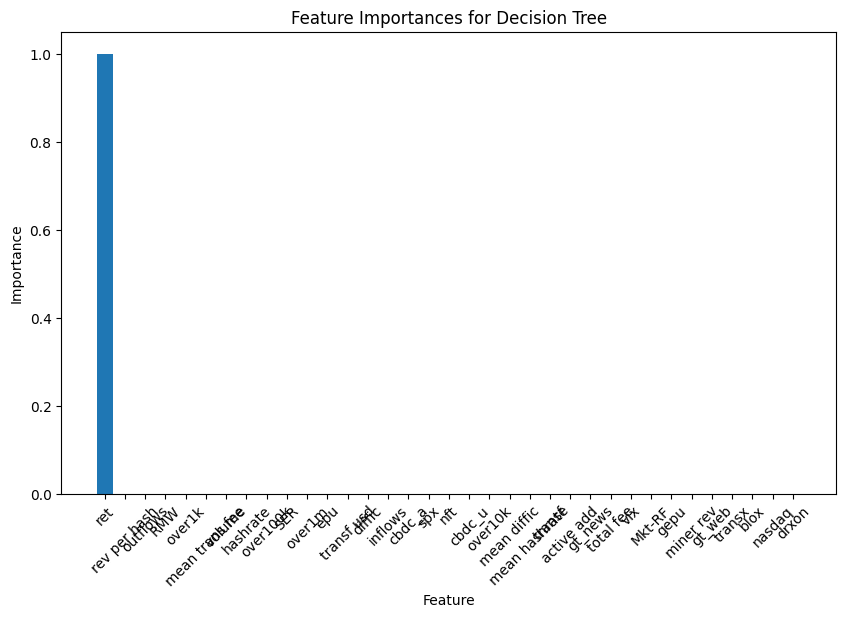

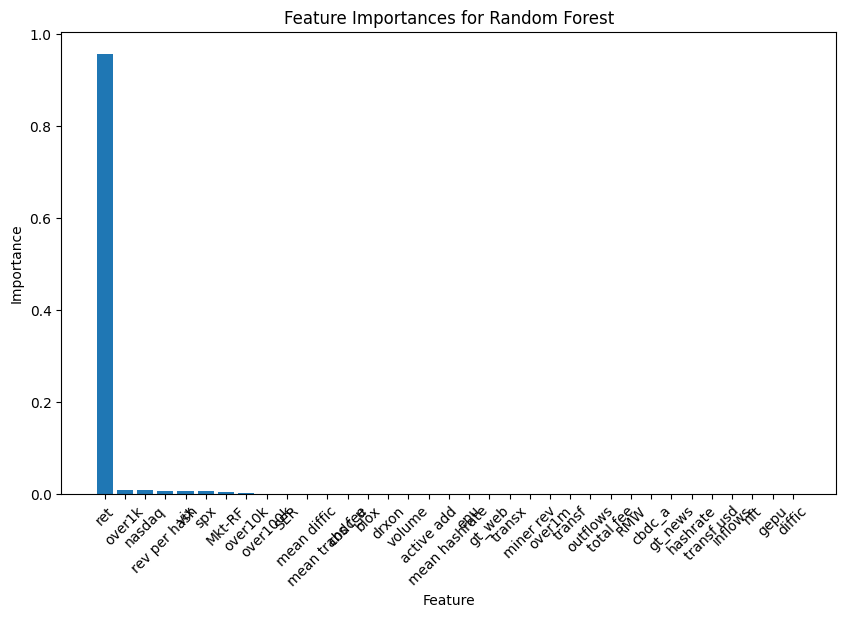

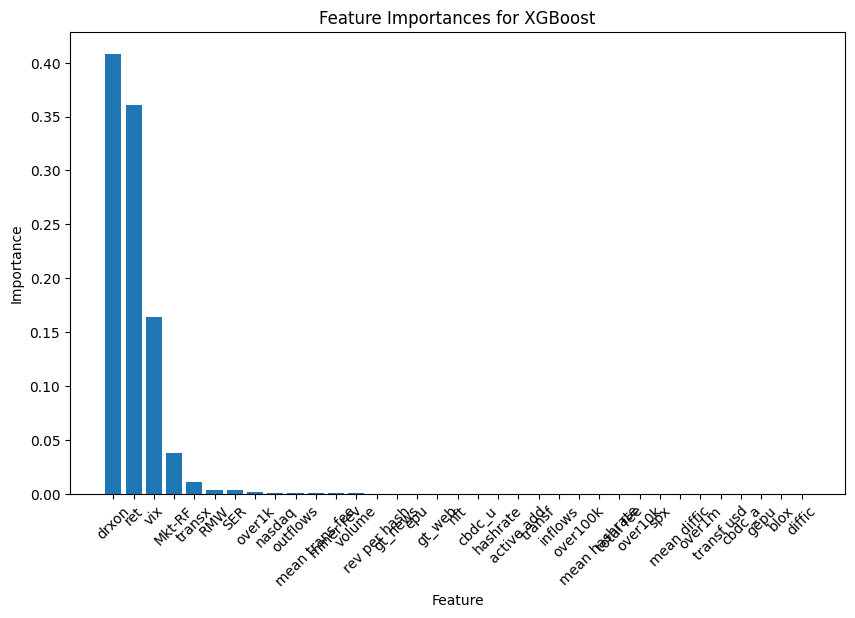

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters for Random Forest: {'n_estimators': 20, 'max_depth': 9}
Best R2 score: 0.968007879511499


In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Load data
path = '/content/btc_nov20change0F.xlsx'
df = pd.read_excel(path)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Handle missing values and convert columns to numeric
for col in df.columns:
    if col != 'Date':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Define features and target variable
features = [
    'RMW', 'ret', 'Mkt-RF', 'volume', 'drxon', 'spx', 'nasdaq', 'vix',
    'epu', 'gepu', 'nft', 'cbdc_u', 'cbdc_a', 'gt_web', 'gt_news',
    'SER', 'active add', 'over10k', 'over100k', 'over1m', 'over1k',
    'mean trans fee', 'total fee', 'miner rev', 'rev per hash', 'hashrate',
    'mean hashrate', 'blox', 'diffic', 'mean diffic', 'inflows', 'outflows',
    'transx', 'transf usd', 'transf'
]
target = 'ret'

# Split the data
cutoff_date = pd.to_datetime('2023-01-01')
train_data = df[df['Date'] < cutoff_date].reset_index(drop=True)
test_data = df[df['Date'] >= cutoff_date].reset_index(drop=True)

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Preprocess data using a pipeline
pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate models
results = []
feature_importances = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2})

    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

results_df = pd.DataFrame(results)
print(results_df)

# Plot feature importances
for name, importances in feature_importances.items():
    indices = np.argsort(importances)[::-1]
    sorted_names = [features[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), sorted_names, rotation=45)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()

# Hyperparameter tuning (example for Random Forest)
param_grid = {
    'n_estimators': range(10, 210, 10),
    'max_depth': range(3, 11)
}
rf = RandomForestRegressor()
grid_search = RandomizedSearchCV(rf, param_grid, n_iter=50, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters for Random Forest: {grid_search.best_params_}")
print(f"Best R2 score: {grid_search.best_score_}")


Possible 2

               Model  Test MSE  Test MAE   Test R2
0  Linear Regression  0.000133  0.006452  0.743912
1   Ridge Regression  0.000131  0.006349  0.747499
2   Lasso Regression  0.000518  0.015212 -0.000500
3      Decision Tree  0.000048  0.004229  0.907466
4      Random Forest  0.000009  0.002046  0.982997


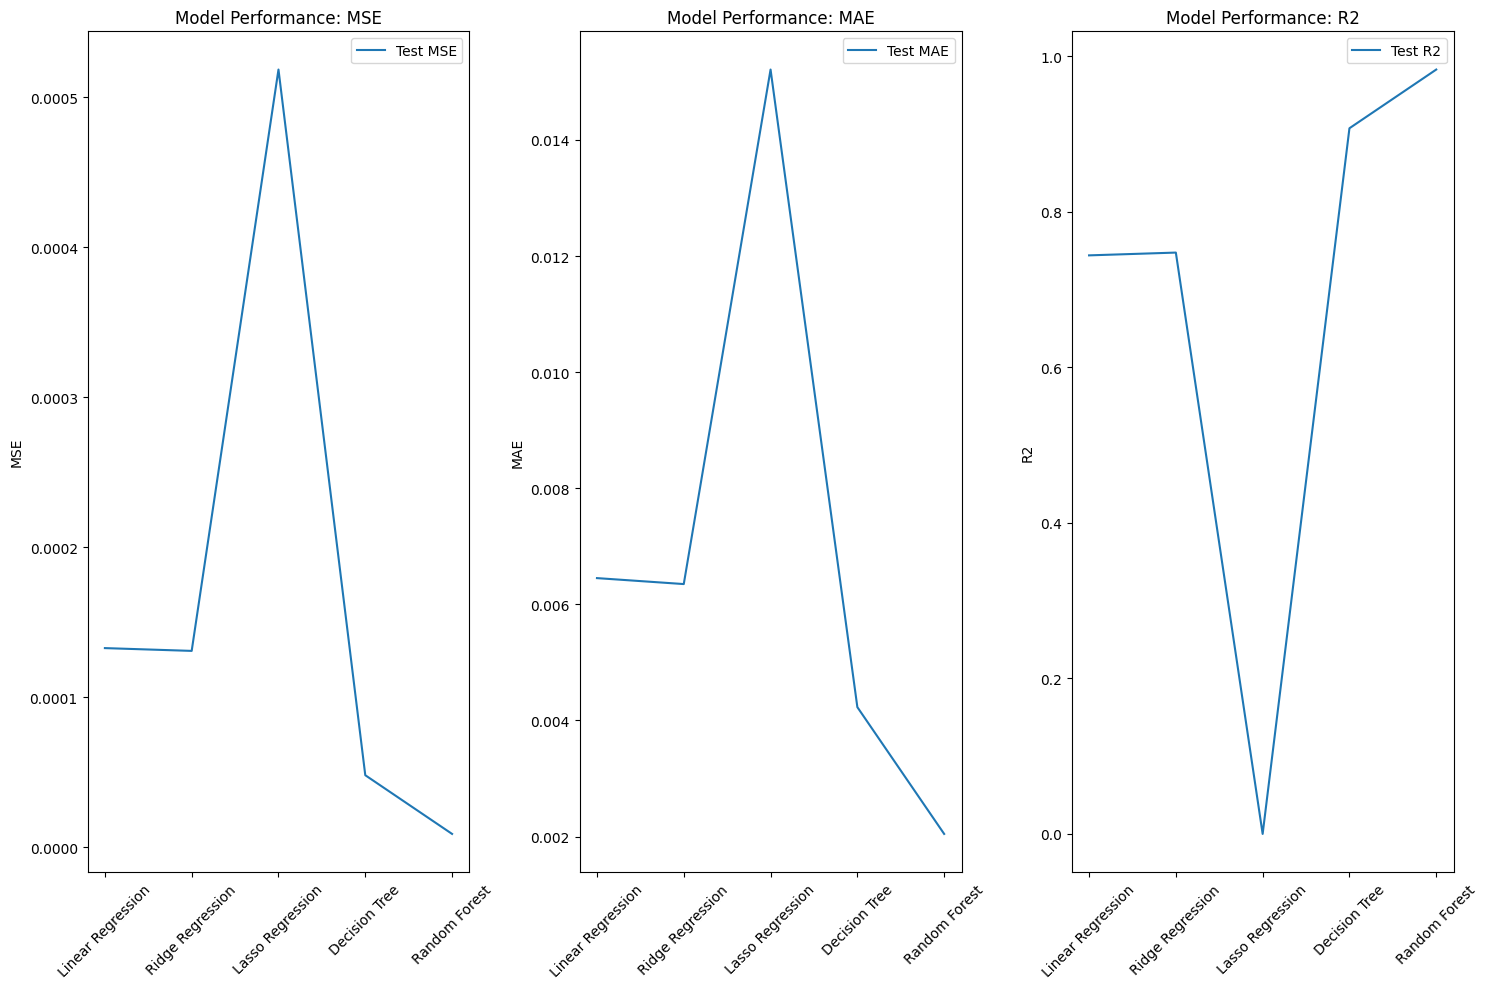

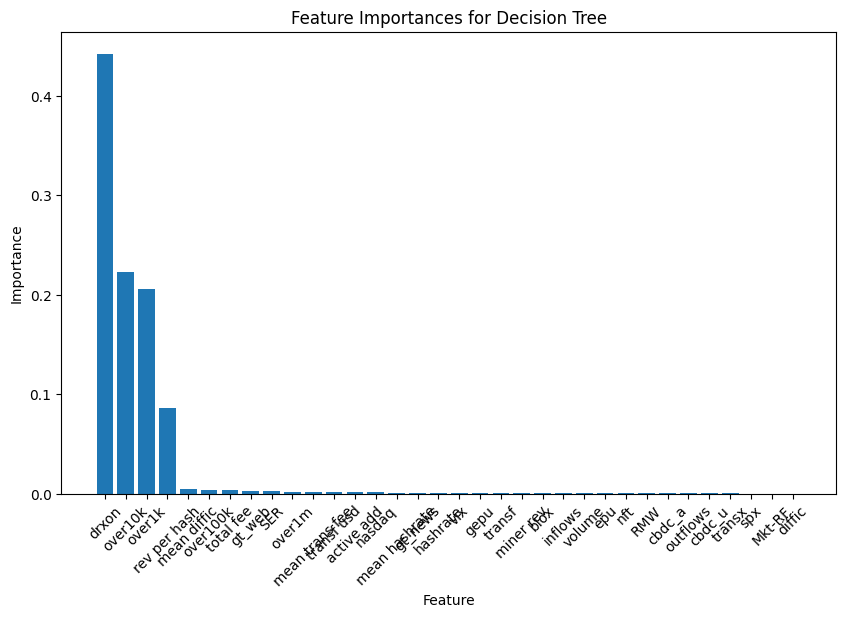

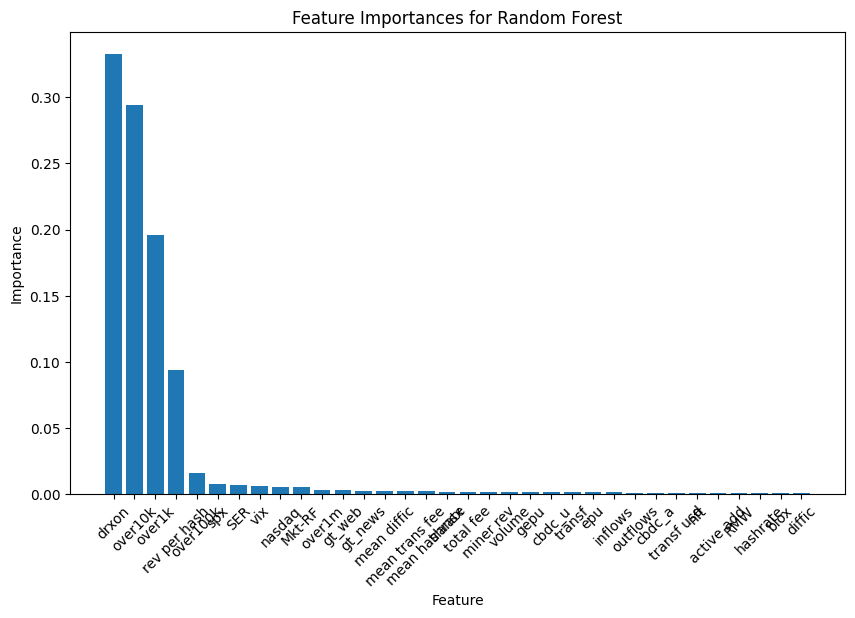

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from datetime import datetime
from typing import Tuple

# Load data (replace with your actual file path)
path = '/content/btc_nov20change0F.xlsx'
df = pd.read_excel(path)
df['Date'] = pd.to_datetime(df['Date'])

# Features and target variable
features = ['RMW', 'Mkt-RF', 'volume', 'drxon', 'spx', 'nasdaq', 'vix', 'epu', 'gepu',
            'nft', 'cbdc_u', 'cbdc_a', 'gt_web', 'gt_news', 'SER', 'active add',
            'over10k', 'over100k', 'over1m', 'over1k', 'mean trans fee', 'total fee',
            'miner rev', 'rev per hash', 'hashrate', 'mean hashrate', 'blox', 'diffic',
            'mean diffic', 'inflows', 'outflows', 'transx', 'transf usd', 'transf']
target = 'ret'

# Convert features to numeric, coercing errors to NaN
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Define the cutoff date for splitting data
cutoff_date = datetime(2023, 1, 1)

# Function to split the data into training and testing sets
def custom_train_test_split(df: pd.DataFrame, cutoff_date: datetime, target_column_name: str) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    train_data = df[df['Date'] < cutoff_date].reset_index(drop=True)
    test_data = df[df['Date'] >= cutoff_date].reset_index(drop=True)

    X_train = train_data[features]
    y_train = train_data[target_column_name]
    X_test = test_data[features]
    y_test = test_data[target_column_name]

    return X_train, y_train, X_test, y_test

# Split the data
X_train, y_train, X_test, y_test = custom_train_test_split(df, cutoff_date, target)

# Apply Imputation and Scaling in the correct order
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pipeline = make_pipeline(imputer, scaler)

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = []
feature_importances = {}

# Loop through each model, train it, evaluate, and collect results
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_predictions = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    results.append({'Model': name, 'Test MSE': test_mse, 'Test MAE': test_mae, 'Test R2': test_r2})

    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

# Convert the results list into a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

# Plotting performance metrics for each model
metrics = ['MSE', 'MAE', 'R2']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.plot(results_df['Model'], results_df[f'Test {metric}'], label=f'Test {metric}')
    plt.title(f'Model Performance: {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting feature importances for each model (if available)
for model_name, importances in feature_importances.items():
    indices = np.argsort(importances)[::-1]
    sorted_names = [features[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), sorted_names, rotation=45)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()


New Dataset

Posible

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data (replace with your actual file path)
path = '/content/augmento_btc_returns.xls'
df = pd.read_excel(path)

# Check if 'Date' column exists, if not, try finding a similar column
if 'Date' not in df.columns:
    # Try to find a column that looks like a date column
    date_columns = [col for col in df.columns if 'date' in col.lower()]
    if date_columns:
        date_column = date_columns[0]  # Use the first date-like column found
        print(f"Using column '{date_column}' as date column.")
        df[date_column] = pd.to_datetime(df[date_column])
    else:
        print("No date column found. Please check your data.")
else:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Define your features
features = [
    'twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation',
    'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom',
    'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned',
    'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis',
    'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling',
    'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain', 'twitter_volume', 'twitter_risk',
    'twitter_governance', 'twitter_ban', 'twitter_cheap', 'twitter_short_term_trading', 'twitter_fork', 'twitter_progress',
    'twitter_shilling', 'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful',
    'twitter_bug', 'twitter_open_source', 'twitter_token_economics', 'twitter_security', 'twitter_marketing',
    'twitter_bad_news', 'twitter_due_diligence', 'twitter_team', 'twitter_partnerships', 'twitter_pump_and_dump',
    'twitter_sad', 'twitter_panicking', 'twitter_listing', 'twitter_regulation_politics', 'twitter_dip', 'twitter_launch',
    'twitter_fomo_theme', 'twitter_advice_support', 'twitter_rebranding', 'twitter_wallet', 'twitter_good_news',
    'twitter_problems_and_issues', 'twitter_mining', 'twitter_waiting', 'twitter_learning', 'twitter_scaling', 'twitter_fees',
    'twitter_roadmap', 'twitter_recovery', 'twitter_technology', 'twitter_mistrustful', 'twitter_marketcap', 'twitter_positive',
    'twitter_tax', 'twitter_long_term_investing', 'twitter_strategy', 'twitter_competition', 'twitter_whales',
    'twitter_correction', 'twitter_stablecoin', 'twitter_buying', 'twitter_warning', 'twitter_annoyed_frustrated',
    'twitter_price', 'twitter_use_case_applications', 'twitter_rumor', 'twitter_scam_fraud', 'twitter_airdrop',
    'twitter_optimistic', 'twitter_negative', 'bitcointalk_hacks', 'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks',
    'bitcointalk_selling', 'bitcointalk_market_manipulation', 'bitcointalk_de_centralisation', 'bitcointalk_angry',
    'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom', 'bitcointalk_institutional_money', 'bitcointalk_fomo',
    'bitcointalk_prediction', 'bitcointalk_adoption', 'bitcointalk_fearful_concerned', 'bitcointalk_portfolio',
    'bitcointalk_fud_theme', 'bitcointalk_whitepaper', 'bitcointalk_announcements', 'bitcointalk_technical_analysis',
    'bitcointalk_flippening', 'bitcointalk_community', 'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited',
    'bitcointalk_hodling', 'bitcointalk_ico', 'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain',
    'bitcointalk_volume', 'bitcointalk_risk', 'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap',
    'bitcointalk_short_term_trading', 'bitcointalk_fork', 'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish',
    'bitcointalk_happy', 'bitcointalk_bubble', 'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug',
    'bitcointalk_open_source', 'bitcointalk_token_economics', 'bitcointalk_security', 'bitcointalk_marketing',
    'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team', 'bitcointalk_partnerships', 'bitcointalk_pump_and_dump',
    'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing', 'bitcointalk_regulation_politics', 'bitcointalk_dip',
    'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support', 'bitcointalk_rebranding', 'bitcointalk_wallet',
    'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining', 'bitcointalk_waiting', 'bitcointalk_learning',
    'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery', 'bitcointalk_technology',
    'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin',
    'bitcointalk_buying', 'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications',
    'bitcointalk_rumor', 'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative',
    'reddit_hacks', 'reddit_pessimistic_doubtful', 'reddit_banks', 'reddit_selling', 'reddit_market_manipulation',
    'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage', 'reddit_bottom', 'reddit_institutional_money',
    'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio', 'reddit_fud_theme',
    'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community',
    'reddit_investing_trading', 'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short',
    'reddit_uncertain', 'reddit_volume', 'reddit_risk', 'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading',
    'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish', 'reddit_happy', 'reddit_bubble', 'reddit_bots',
    'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security', 'reddit_marketing',
    'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad',
    'reddit_panicking', 'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
    'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
    'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees', 'reddit_roadmap', 'reddit_recovery', 'reddit_technology',
    'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing', 'reddit_strategy',
    'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying', 'reddit_warning',
    'reddit_annoyed_frustrated', 'reddit_price', 'reddit_use_case_applications', 'reddit_rumor', 'reddit_scam_fraud', 'reddit_airdrop',
    'reddit_optimistic', 'reddit_negative'
]

target = 'returns'


Using column 'date' as date column.


In [35]:
# Check if all features are present in the DataFrame
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Warning: The following features are not in the DataFrame: {missing_features}")

# Option 1: Remove missing features
features = [f for f in features if f in df.columns]

# Now you can safely select the features
X = df[features]
y = df[target]

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Handle missing values in the target variable
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
# Convert Pandas Series to NumPy arrays before reshaping
y_train_reshaped = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_reshaped = imputer.transform(y_test.values.reshape(-1, 1))

Mean Squared Error: 6.839789890177169e-05
               Model  Test MSE  Test MAE   Test R2
0  Linear Regression  0.000068  0.004931  0.038609
1   Ridge Regression  0.000068  0.004931  0.038609
2   Lasso Regression  0.000071  0.004897 -0.000011
3      Decision Tree  0.000137  0.007294 -0.923310
4      Random Forest  0.000069  0.004863  0.027250


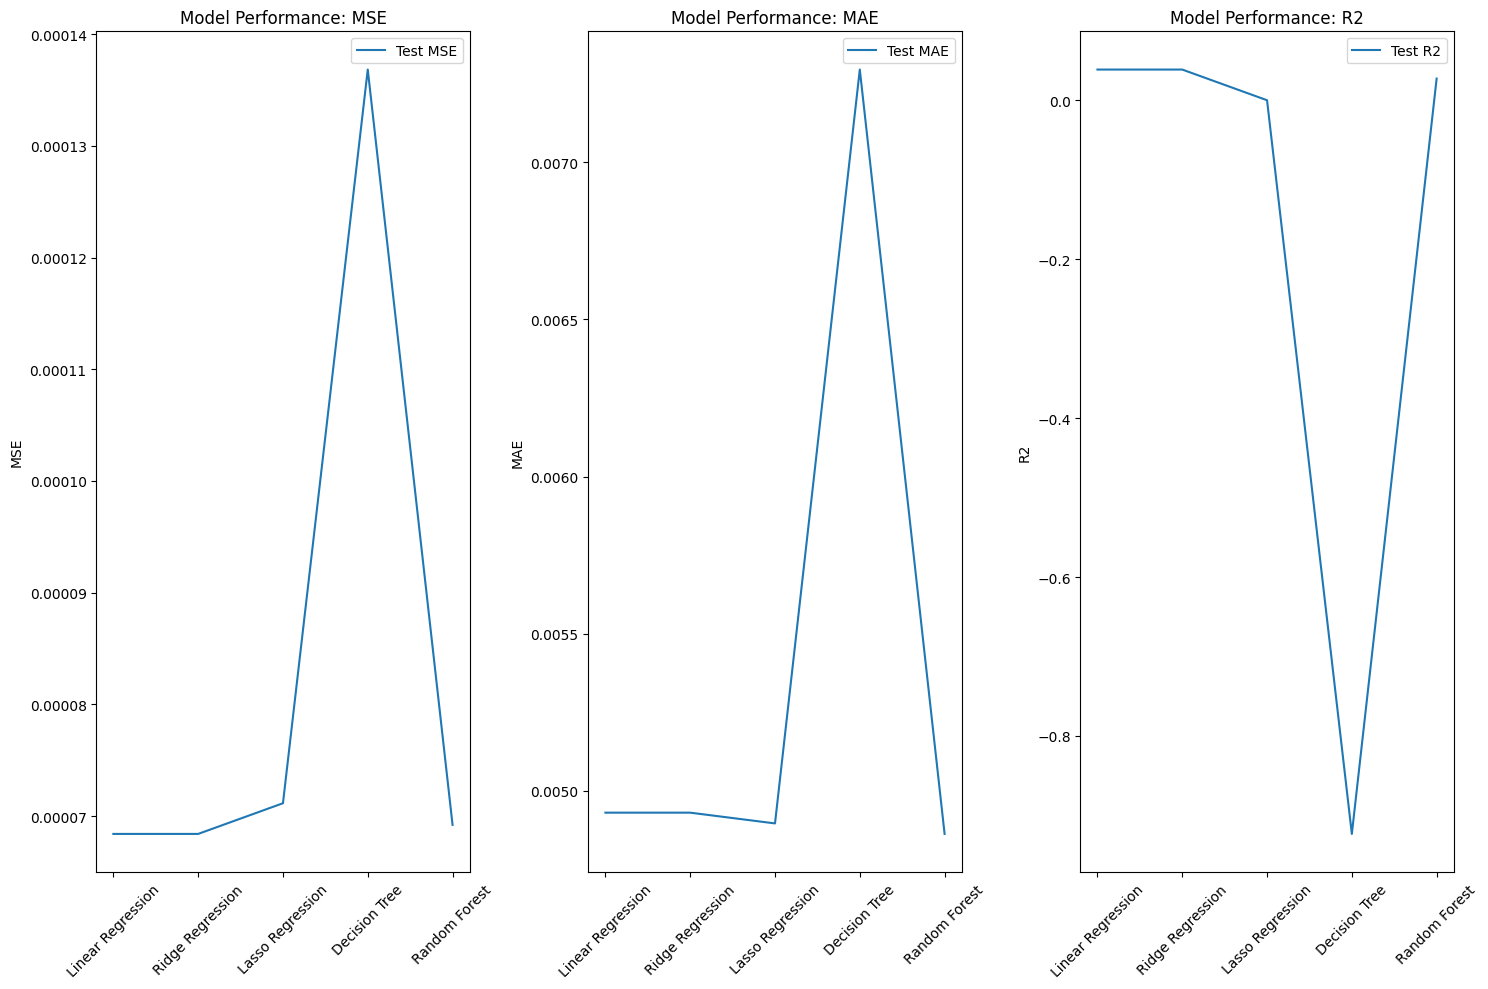

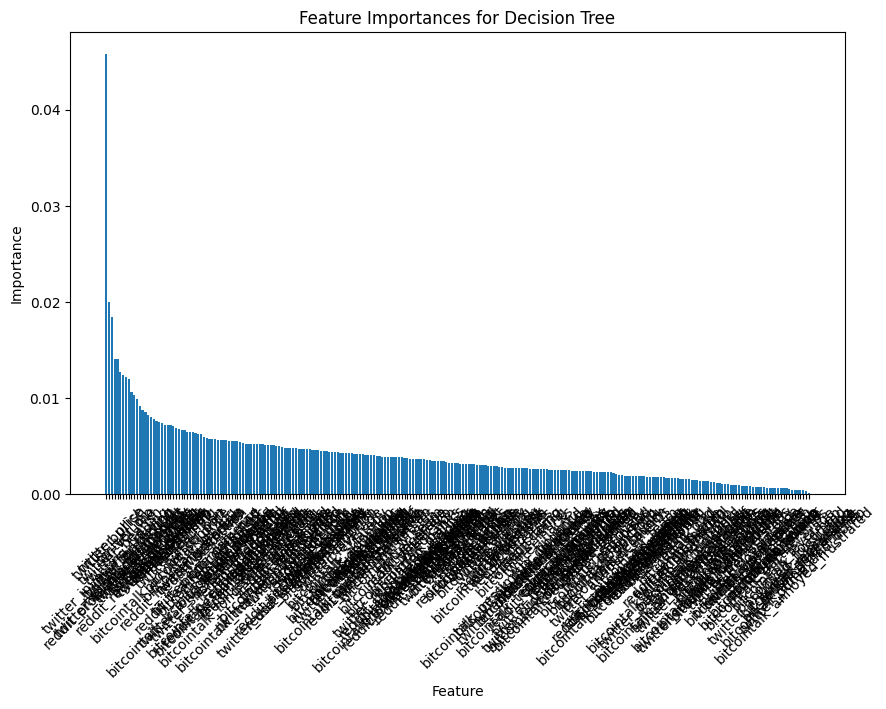

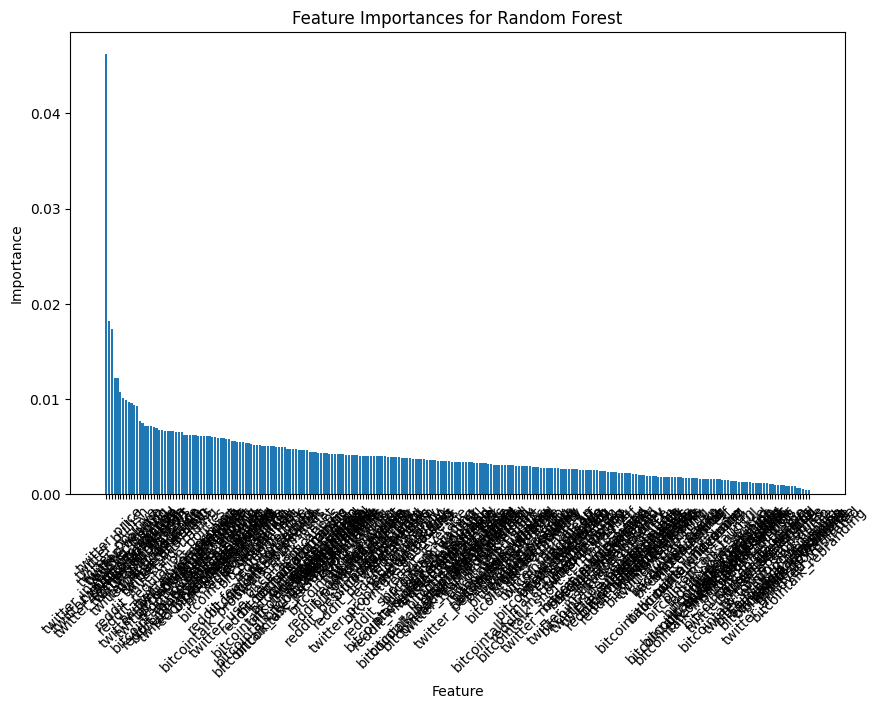

In [37]:
# Assume df is your DataFrame containing all the data
# Replace 'returns' with the actual name of your target column
target = 'returns'

# Split the data into features and target
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values and scale the data
imputer = SimpleImputer(strategy='mean') # Impute missing values in features
scaler = StandardScaler()

pipeline = make_pipeline(imputer, scaler)

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Handle missing values in the target variable (y_train and y_test)
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel() # Impute and flatten
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel() # Impute and flatten

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = []
feature_importances = {}

# Loop through each model, train it, evaluate, and collect results
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_predictions = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    results.append({'Model': name, 'Test MSE': test_mse, 'Test MAE': test_mae, 'Test R2': test_r2})

    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

# Convert the results list into a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

# Plotting performance metrics for each model
metrics = ['MSE', 'MAE', 'R2']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.plot(results_df['Model'], results_df[f'Test {metric}'], label=f'Test {metric}')
    plt.title(f'Model Performance: {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting feature importances for each model (if available)
for model_name, importances in feature_importances.items():
    indices = np.argsort(importances)[::-1]
    sorted_names = [features[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), sorted_names, rotation=45)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()


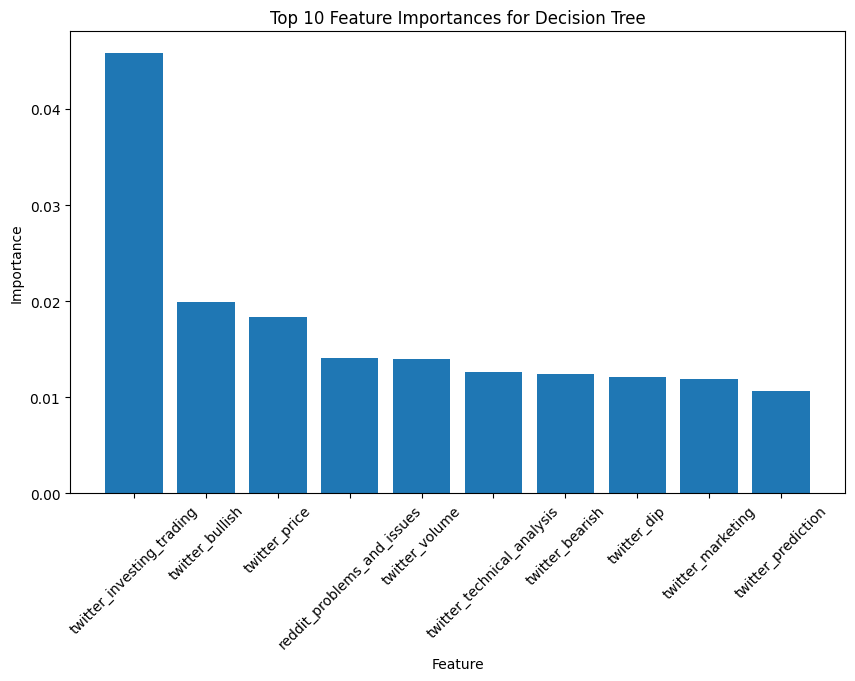

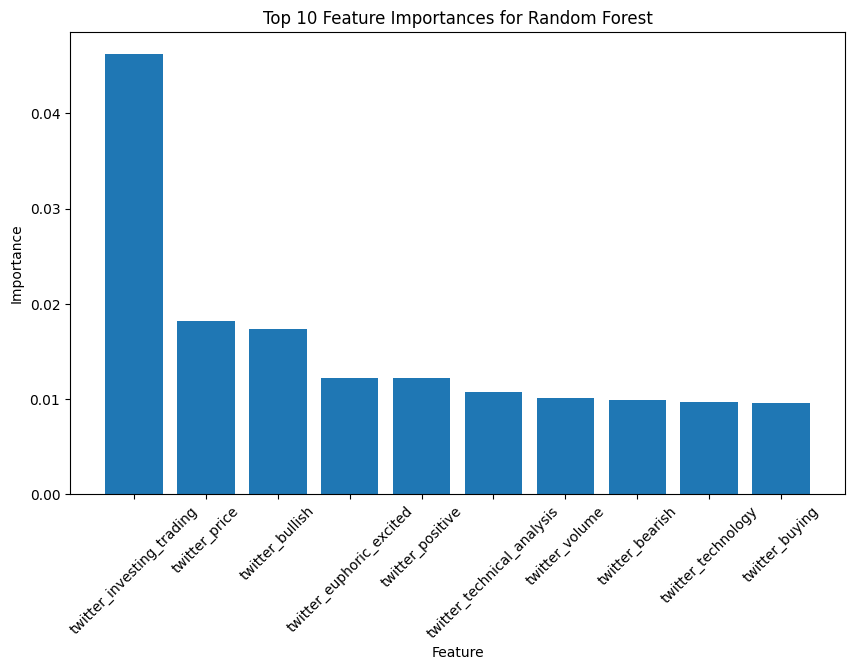

In [38]:
# Plotting feature importances for each model (if available)
for model_name, importances in feature_importances.items():
  # Sort features by importance in descending order
  indices = np.argsort(importances)[::-1]
  sorted_names = [features[i] for i in indices]

  # Truncate to top 10 features
  top_10_features = sorted_names[:10]
  top_10_importances = importances[indices][:10]

  plt.figure(figsize=(10, 6))
  plt.title(f'Top 10 Feature Importances for {model_name}')
  plt.bar(range(len(top_10_importances)), top_10_importances, align='center')
  plt.xticks(range(len(top_10_importances)), top_10_features, rotation=45)
  plt.ylabel('Importance')
  plt.xlabel('Feature')
  plt.show()

Experiment 2 - Split the training and testing across years, with scaling

               Model  Test MSE  Test MAE   Test R2
0  Linear Regression  0.000025  0.003090  0.004799
1   Ridge Regression  0.000025  0.003090  0.004804
2   Lasso Regression  0.000025  0.003017 -0.000156
3      Decision Tree  0.000059  0.004901 -1.380719
4      Random Forest  0.000025  0.003073 -0.006882


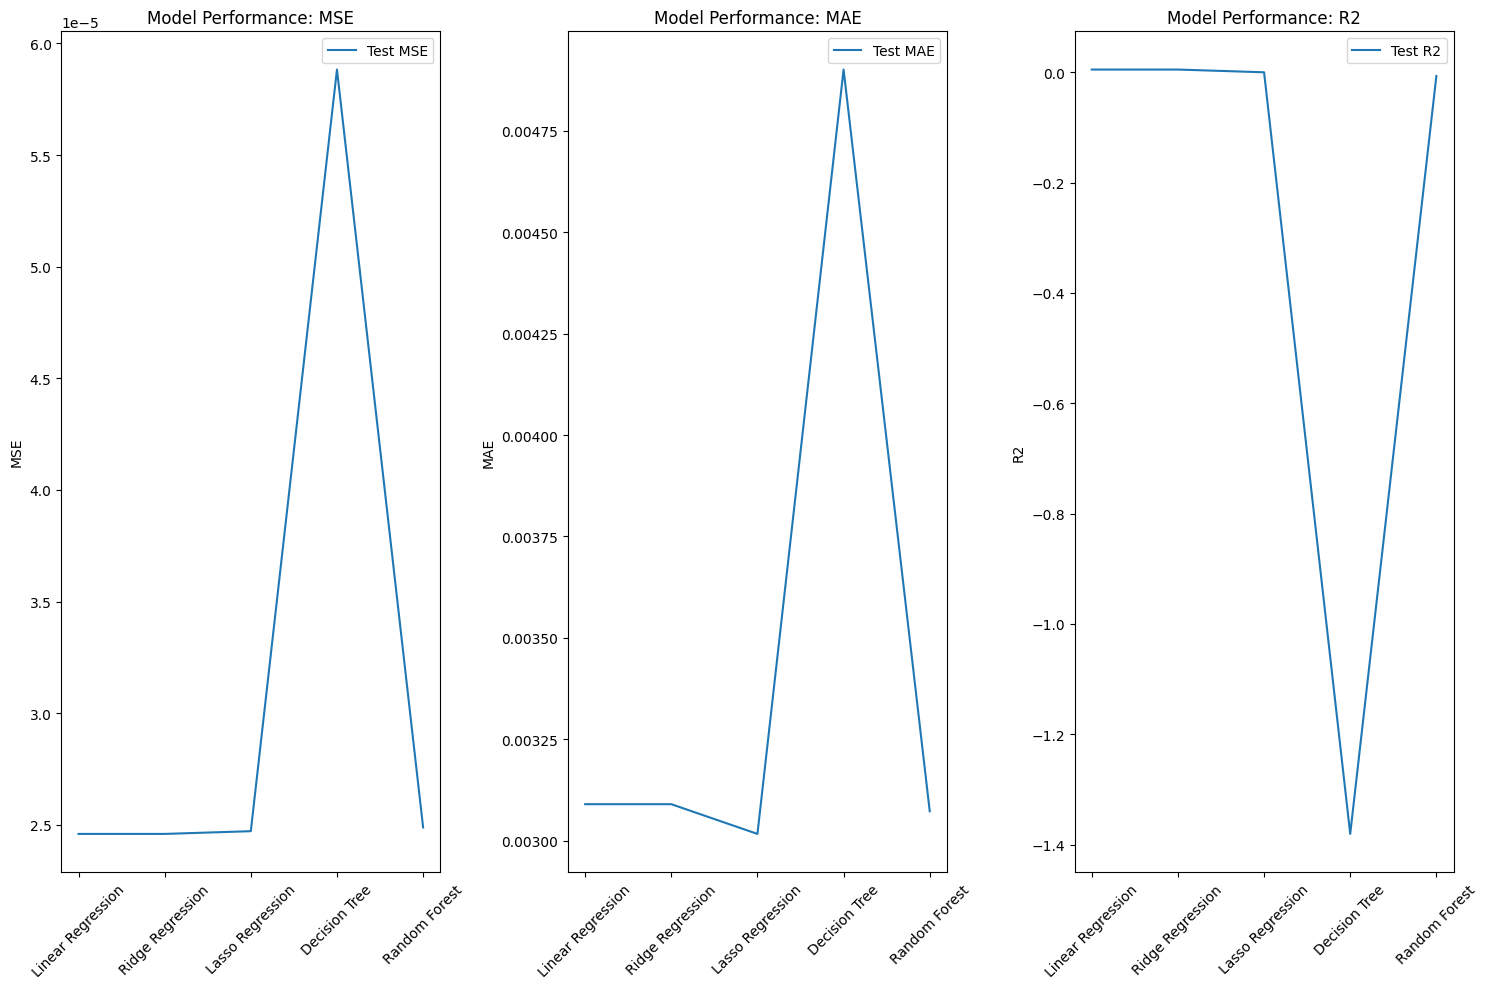

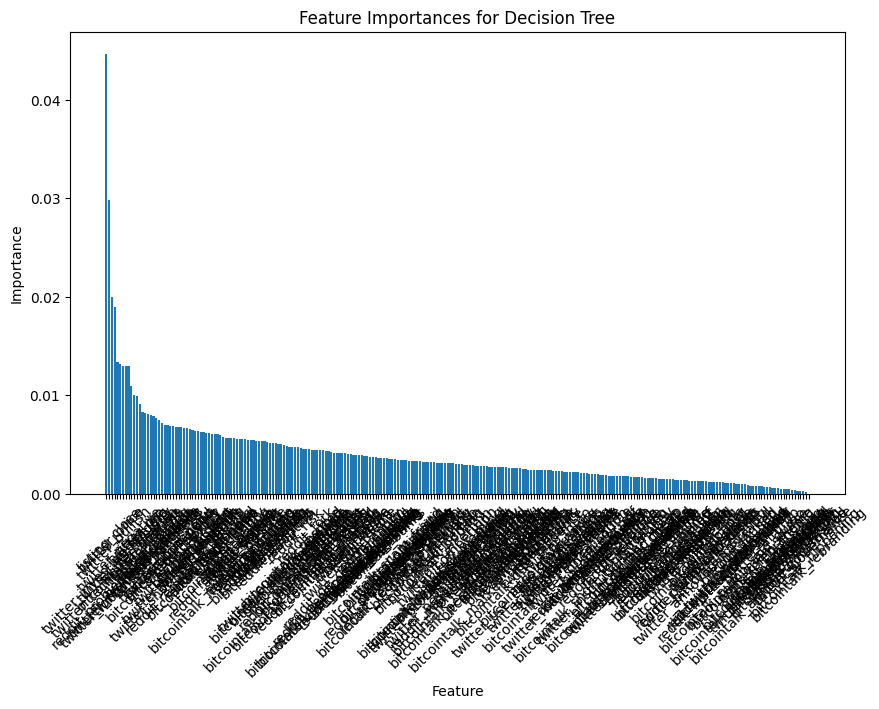

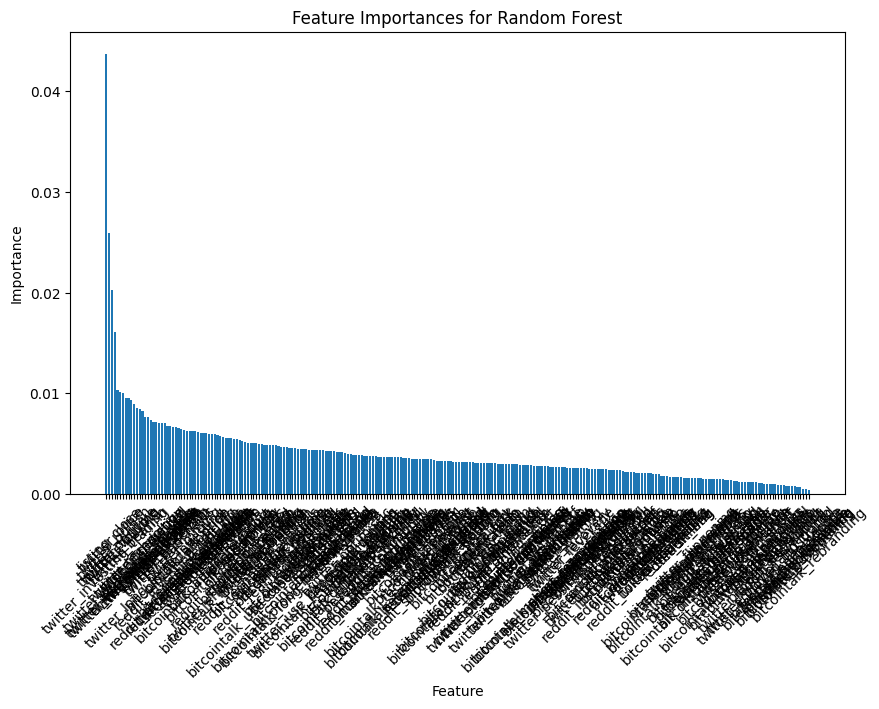

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
from typing import Tuple
from sklearn.impute import SimpleImputer

# Load your data
# Replace with your actual data loading mechanism
df = pd.read_excel('/content/augmento_btc_returns.xls')

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

def custom_train_test_split(df: pd.DataFrame, cutoff_date: datetime, target_column_name: str, date_column_name: str) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    """
    Splits a DataFrame into training and testing sets based on a specified cutoff date.

    Parameters:
    - df (pd.DataFrame): The complete dataset containing both features and the target variable.
    - cutoff_date (datetime): The date used to split the data. Data up to this date are included
      in the training set, while data from this date onwards are in the testing set.
    - target_column_name (str): The name of the target variable column in the dataset.
    - date_column_name (str): The name of the column containing the dates.

    Returns:
    - Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]: A tuple containing four elements:
      X_train (DataFrame), y_train (Series), X_test (DataFrame), and y_test (Series).
      X_train and X_test contain the features, while y_train and y_test contain the target variable.
    """
    # Convert the date column to datetime objects
    df[date_column_name] = pd.to_datetime(df[date_column_name])

    # Split the data based on the cutoff date
    train_data = df[df[date_column_name] < cutoff_date].reset_index(drop=True)
    test_data = df[df[date_column_name] >= cutoff_date].reset_index(drop=True)

    # Extract features and target variable for training and testing sets
    X_train = train_data.drop(columns=[target_column_name, date_column_name])  # Remove target and date columns
    y_train = train_data[target_column_name]
    X_test = test_data.drop(columns=[target_column_name, date_column_name])  # Remove target and date columns
    y_test = test_data[target_column_name]

    return X_train, y_train, X_test, y_test

# Define the cutoff date for splitting data
cutoff_date = datetime(2023, 1, 1)

# Assuming 'date' is the name of your date column and 'returns' is your target column
date_column_name = 'date'
target_column_name = 'returns'

# Split the data
X_train, y_train, X_test, y_test = custom_train_test_split(
    df=df,
    cutoff_date=cutoff_date,
    target_column_name=target_column_name,
    date_column_name=date_column_name
)

# Check for NaN values in y_train
if y_train.isnull().any():
    # Handle NaN values in y_train (for example, drop NaN rows)
    X_train = X_train[~y_train.isnull()]
    y_train = y_train.dropna()

# Check for NaN values in y_test
if y_test.isnull().any():
    # Handle NaN values in y_test (for example, drop NaN rows)
    X_test = X_test[~y_test.isnull()]
    y_test = y_test.dropna()

# Define a pipeline with imputation and scaling
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values with mean
    StandardScaler()                # Scale the data
)

# Fit and transform the pipeline on training data
X_train_scaled = pipeline.fit_transform(X_train)
# Transform the test data using the fitted pipeline
X_test_scaled = pipeline.transform(X_test)

# Evaluate models
results = []
feature_importances = {}

# Loop through each model, train it, evaluate, and collect results
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model

    # Evaluate the model on the test data
    test_predictions = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Store the performance metrics for each model
    results.append({'Model': name, 'Test MSE': test_mse, 'Test MAE': test_mae, 'Test R2': test_r2})

    # If the model has feature importances, store them for later use
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_

# Convert the results list into a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

# Plotting performance metrics for each model
metrics = ['MSE', 'MAE', 'R2']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    # Create a subplot for each metric
    plt.subplot(1, 3, i+1)
    plt.plot(results_df['Model'], results_df[f'Test {metric}'], label=f'Test {metric}')
    plt.title(f'Model Performance: {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting feature importances for each model (if available)
for model_name, importances in feature_importances.items():
    # Sort the feature importances in descending order
    indices = np.argsort(importances)[::-1]
    sorted_names = X_train.columns[indices]  # Use X_train columns for feature names

    # Create a bar plot for each model's feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), sorted_names, rotation=45)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()


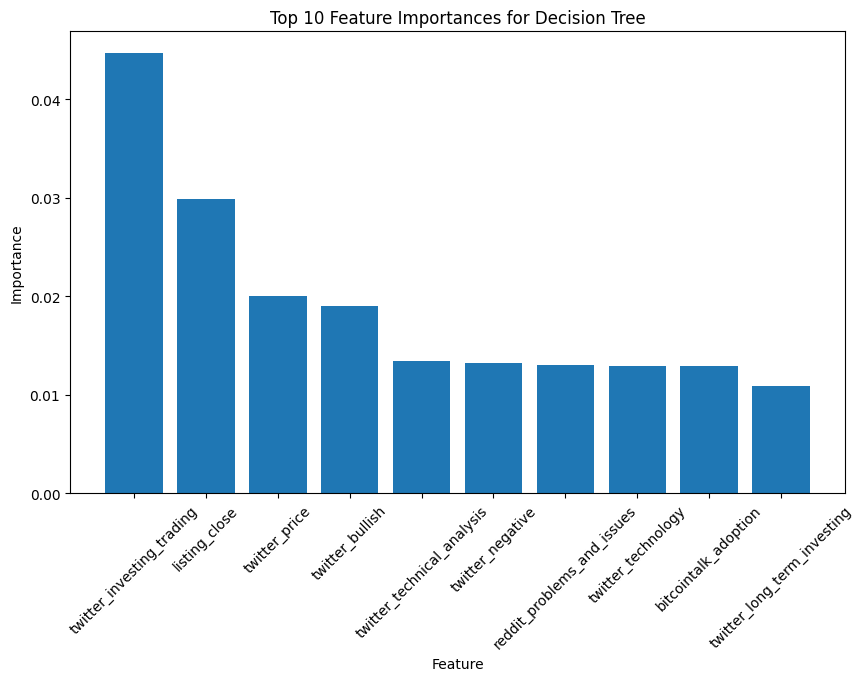

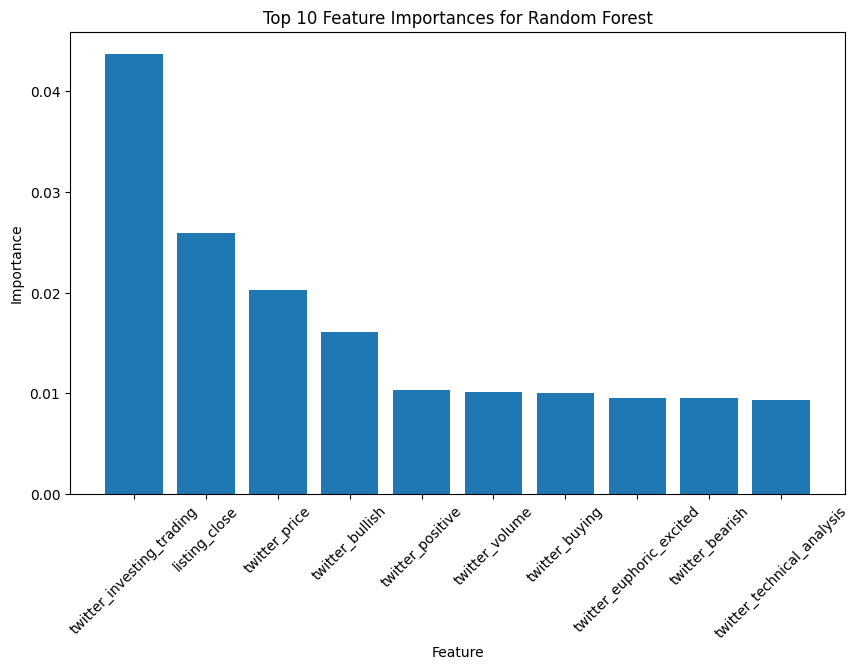

In [41]:
# Plotting feature importances for each model (if available)
for model_name, importances in feature_importances.items():
  # Sort features by importance in descending order
  indices = np.argsort(importances)[::-1]
  # Use the column names from the training data instead of the 'features' list
  sorted_names = X_train.columns[indices]

  # Truncate to top 10 features
  top_10_features = sorted_names[:10]
  top_10_importances = importances[indices][:10]

  plt.figure(figsize=(10, 6))
  plt.title(f'Top 10 Feature Importances for {model_name}')
  plt.bar(range(len(top_10_importances)), top_10_importances, align='center')
  plt.xticks(range(len(top_10_importances)), top_10_features, rotation=45)
  plt.ylabel('Importance')
  plt.xlabel('Feature')
  plt.show()

Experiment 3 - Split the training and testing across years, with Normalization

Using column 'date' as date column.
Initial NaN value inspection in features:
twitter_hacks                   0
twitter_pessimistic_doubtful    0
twitter_banks                   0
twitter_selling                 0
twitter_market_manipulation     0
                               ..
reddit_wallet                   0
reddit_good_news                0
reddit_problems_and_issues      0
reddit_mining                   0
reddit_waiting                  0
Length: 413, dtype: int64
Initial NaN value inspection in target:
56
Dropped 61 rows due to NaN or non-numeric values in the target variable.
Final NaN value inspection in features after imputation and dropna:
twitter_hacks                   0
twitter_pessimistic_doubtful    0
twitter_banks                   0
twitter_selling                 0
twitter_market_manipulation     0
                               ..
reddit_wallet                   0
reddit_good_news                0
reddit_problems_and_issues      0
reddit_mining                   

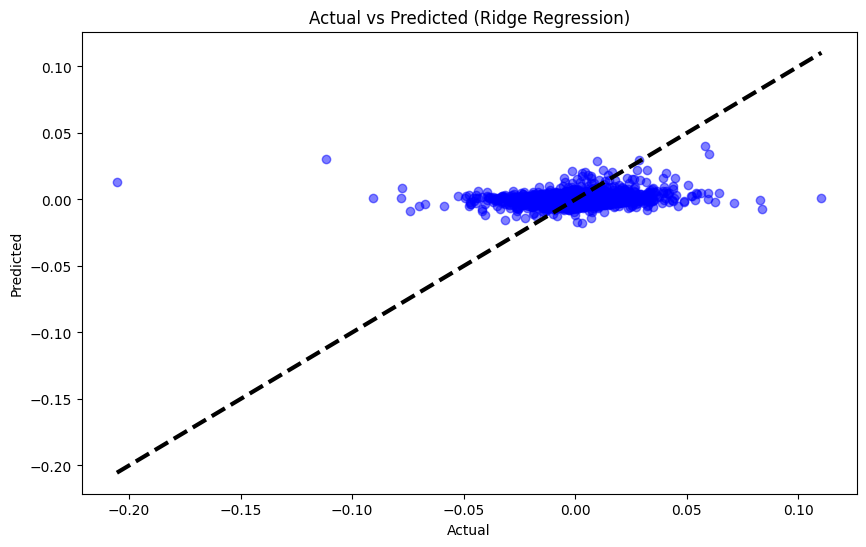

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load data
path = '/content/augmento_btc_returns.xlsx'
df = pd.read_excel(path)

# Check if 'Date' column exists, if not, try finding a similar column
if 'Date' not in df.columns:
    date_columns = [col for col in df.columns if 'date' in col.lower()]
    if date_columns:
        date_column = date_columns[0]  # Use the first date-like column found
        print(f"Using column '{date_column}' as date column.")
        df[date_column] = pd.to_datetime(df[date_column])
    else:
        print("No date column found. Please check your data.")
else:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime

# Define your features and targets
features = [
    'twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation',
    'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom',
    'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned',
    'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis',
    'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling',
    'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain', 'twitter_volume', 'twitter_risk',
    'twitter_governance', 'twitter_ban', 'twitter_cheap', 'twitter_short_term_trading', 'twitter_fork', 'twitter_progress',
    'twitter_shilling', 'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful',
    'twitter_bug', 'twitter_open_source', 'twitter_token_economics', 'twitter_security', 'twitter_marketing',
    'twitter_bad_news', 'twitter_due_diligence', 'twitter_team', 'twitter_partnerships', 'twitter_pump_and_dump',
    'twitter_sad', 'twitter_panicking', 'twitter_listing', 'twitter_regulation_politics', 'twitter_dip', 'twitter_launch',
    'twitter_fomo_theme', 'twitter_advice_support', 'twitter_rebranding', 'twitter_wallet', 'twitter_good_news',
    'twitter_problems_and_issues', 'twitter_mining', 'twitter_waiting', 'twitter_learning', 'twitter_scaling', 'twitter_fees',
    'twitter_roadmap', 'twitter_recovery', 'twitter_technology', 'twitter_mistrustful', 'twitter_marketcap', 'twitter_positive',
    'twitter_tax', 'twitter_long_term_investing', 'twitter_strategy', 'twitter_competition', 'twitter_whales',
    'twitter_correction', 'twitter_stablecoin', 'twitter_buying', 'twitter_warning', 'twitter_annoyed_frustrated',
    'twitter_price', 'twitter_use_case_applications', 'twitter_rumor', 'twitter_scam_fraud', 'twitter_airdrop',
    'twitter_optimistic', 'twitter_negative', 'bitcointalk_hacks', 'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks',
    'bitcointalk_selling', 'bitcointalk_market_manipulation', 'bitcointalk_de_centralisation', 'bitcointalk_angry',
    'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom', 'bitcointalk_institutional_money', 'bitcointalk_fomo',
    'bitcointalk_prediction', 'bitcointalk_adoption', 'bitcointalk_fearful_concerned', 'bitcointalk_portfolio',
    'bitcointalk_fud_theme', 'bitcointalk_whitepaper', 'bitcointalk_announcements', 'bitcointalk_technical_analysis',
    'bitcointalk_flippening', 'bitcointalk_community', 'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited',
    'bitcointalk_hodling', 'bitcointalk_ico', 'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain',
    'bitcointalk_volume', 'bitcointalk_risk', 'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap',
    'bitcointalk_short_term_trading', 'bitcointalk_fork', 'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish',
    'bitcointalk_happy', 'bitcointalk_bubble', 'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug',
    'bitcointalk_open_source', 'bitcointalk_token_economics', 'bitcointalk_security', 'bitcointalk_marketing',
    'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team', 'bitcointalk_partnerships', 'bitcointalk_pump_and_dump',
    'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing', 'bitcointalk_regulation_politics', 'bitcointalk_dip',
    'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support', 'bitcointalk_rebranding', 'bitcointalk_wallet',
    'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining', 'bitcointalk_waiting', 'bitcointalk_learning',
    'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery', 'bitcointalk_technology',
    'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin',
    'bitcointalk_buying', 'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications',
    'bitcointalk_rumor', 'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative',
    'reddit_hacks', 'reddit_pessimistic_doubtful', 'reddit_banks', 'reddit_selling', 'reddit_market_manipulation',
    'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage', 'reddit_bottom', 'reddit_institutional_money',
    'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio', 'reddit_fud_theme',
    'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community',
    'reddit_investing_trading', 'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short',
    'reddit_uncertain', 'reddit_volume', 'reddit_risk', 'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading',
    'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish', 'reddit_happy', 'reddit_bubble', 'reddit_bots',
    'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security', 'reddit_marketing',
    'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad',
    'reddit_panicking', 'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
    'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
    'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees', 'reddit_roadmap', 'reddit_recovery',
    'reddit_technology', 'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing',
    'reddit_strategy', 'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying',
    'reddit_warning', 'reddit_annoyed_frustrated', 'reddit_price', 'reddit_use_case_applications', 'reddit_rumor',
    'reddit_scam_fraud', 'reddit_airdrop', 'reddit_optimistic', 'reddit_negative', 'bitcointalk_hacks',
    'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks', 'bitcointalk_selling', 'bitcointalk_market_manipulation',
    'bitcointalk_de_centralisation', 'bitcointalk_angry', 'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom',
    'bitcointalk_institutional_money', 'bitcointalk_fomo', 'bitcointalk_prediction', 'bitcointalk_adoption',
    'bitcointalk_fearful_concerned', 'bitcointalk_portfolio', 'bitcointalk_fud_theme', 'bitcointalk_whitepaper',
    'bitcointalk_announcements', 'bitcointalk_technical_analysis', 'bitcointalk_flippening', 'bitcointalk_community',
    'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited', 'bitcointalk_hodling', 'bitcointalk_ico',
    'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain', 'bitcointalk_volume', 'bitcointalk_risk',
    'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap', 'bitcointalk_short_term_trading', 'bitcointalk_fork',
    'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish', 'bitcointalk_happy', 'bitcointalk_bubble',
    'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug', 'bitcointalk_open_source', 'bitcointalk_token_economics',
    'bitcointalk_security', 'bitcointalk_marketing', 'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team',
    'bitcointalk_partnerships', 'bitcointalk_pump_and_dump', 'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing',
    'bitcointalk_regulation_politics', 'bitcointalk_dip', 'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support',
    'bitcointalk_rebranding', 'bitcointalk_wallet', 'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining',
    'bitcointalk_waiting', 'bitcointalk_learning', 'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery',
    'bitcointalk_technology', 'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin', 'bitcointalk_buying',
    'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications', 'bitcointalk_rumor',
    'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative', 'reddit_hacks', 'reddit_pessimistic_doubtful',
    'reddit_banks', 'reddit_selling', 'reddit_market_manipulation', 'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage',
    'reddit_bottom', 'reddit_institutional_money', 'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio',
    'reddit_fud_theme', 'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community', 'reddit_investing_trading',
    'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short', 'reddit_uncertain', 'reddit_volume', 'reddit_risk',
    'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading', 'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish',
    'reddit_happy', 'reddit_bubble', 'reddit_bots', 'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security',
    'reddit_marketing', 'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad', 'reddit_panicking',
    'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme', 'reddit_advice_support', 'reddit_rebranding',
    'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining', 'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees',
    'reddit_roadmap', 'reddit_recovery', 'reddit_technology', 'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing',
    'reddit_strategy', 'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying', 'reddit_warning', 'reddit_annoyed_frustrated',
    'reddit_price', 'reddit_use_case_applications', 'reddit_rumor', 'reddit_scam_fraud', 'reddit_airdrop', 'reddit_optimistic', 'reddit_negative'
]

target = 'returns'

# Check if all features are present in the DataFrame
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Warning: The following features are not in the DataFrame: {missing_features}")

# Remove missing features from the list
features = [f for f in features if f in df.columns]

# Now you can safely select the features
X = df[features]
y = df[target]

# Step 1: Handling NaN values
# Initial inspection of NaN values
print("Initial NaN value inspection in features:")
print(X.isnull().sum())
print("Initial NaN value inspection in target:")
print(y.isnull().sum())

# Drop rows where the target has NaN values or non-numeric values
y = pd.to_numeric(y, errors='coerce')
rows_before = X.shape[0]
X = X.loc[y.dropna().index]
y = y.dropna()
rows_after = X.shape[0]
print(f"Dropped {rows_before - rows_after} rows due to NaN or non-numeric values in the target variable.")

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check if there are any NaN values remaining after imputation
if X_imputed.isnull().sum().sum() > 0:
    print("Warning: NaN values are still present after imputation. Handling NaN values...")
    X_imputed = X_imputed.dropna(axis=0)  # Drop rows with NaN values
    y = y.loc[X_imputed.index]  # Adjust y accordingly

# Final check to ensure no NaN values are present
print("Final NaN value inspection in features after imputation and dropna:")
print(X_imputed.isnull().sum())
print("Final NaN value inspection in target after imputation and dropna:")
print(y.isnull().sum())

if X_imputed.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    raise ValueError("NaN values detected after imputation and dropna. Please check your data.")

# Step 2: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 3: Training and evaluating regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # Create a pipeline with StandardScaler and the model
    pipeline = make_pipeline(StandardScaler(), model)

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    }

# Step 4: Displaying the results
for model, result in results.items():
    print(f"Model: {model}")
    print(f"  RMSE: {result['RMSE']:.4f}")
    print(f"  MAE: {result['MAE']:.4f}")
    print(f"  R2 Score: {result['R2 Score']:.4f}")
    print()

# Step 5: Visualizing the results (optional)
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = models[best_model_name]

pipeline_best = make_pipeline(StandardScaler(), best_model)
pipeline_best.fit(X_train, y_train)
y_pred_best = pipeline_best.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted ({best_model_name})')
plt.show()

Experiment 4 - Split the training and testing across years, with Normalization, then run a LSTM RNN based on this architecture.

In [17]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
from typing import Tuple

def custom_train_test_split(df: pd.DataFrame, cutoff_date: datetime, target_column_name: str, features: list) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
  """
  Splits a DataFrame into training and testing sets based on a specified cutoff date.

  This function is designed to segment a dataset for time-series analysis, where the integrity
  of the temporal order is crucial. Data points before the cutoff date are used for training,
  while those on or after this date are reserved for testing. This method ensures that the
  testing data simulates a future period relative to the training data.

  Parameters:
  - df (pd.DataFrame): The complete dataset containing both features and the target variable.
  - cutoff_date (datetime): The date used to split the data. Data up to this date are included
    in the training set, while data from this date onwards are in the testing set.
  - target_column_name (str): The name of the target variable column in the dataset.
  - features (list): List of feature column names to be used for training.

  Returns:
  - Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]: A tuple containing four elements:
    X_train (DataFrame), y_train (Series), X_test (DataFrame), and y_test (Series).
    X_train and X_test contain the features, while y_train and y_test contain the target variable.
  """

  # Check for missing 'date' column
  if 'date' not in df.columns:
    print("Error: 'date' column not found in DataFrame. Please check your data.")
    return None, None, None, None

  # Check for missing target column
  if target_column_name not in df.columns:
    print(f"Error: Target column '{target_column_name}' not found in DataFrame. Please check your data.")
    return None, None, None, None

  # Check for missing features
  missing_features = [f for f in features if f not in df.columns]
  if missing_features:
    print(f"Error: Missing features: {', '.join(missing_features)}. Please check your data.")
    return None, None, None, None

  df['date'] = pd.to_datetime(df['date'])
  train_data = df[df['date'] < cutoff_date].reset_index(drop=True)
  test_data = df[df['date'] >= cutoff_date].reset_index(drop=True)

  X_train = train_data[features]
  y_train = pd.to_numeric(train_data[target_column_name], errors='coerce')  # Convert target to numeric, coerce errors to NaN
  X_test = test_data[features]
  y_test = pd.to_numeric(test_data[target_column_name], errors='coerce')  # Convert target to numeric, coerce errors to NaN

  # Drop rows with NaN target values
  train_mask = ~y_train.isna()
  test_mask = ~y_test.isna()

  X_train = X_train[train_mask]
  y_train = y_train[train_mask]
  X_test = X_test[test_mask]
  y_test = y_test[test_mask]

  return X_train, y_train, X_test, y_test

# Example usage with the LSTM model
time_steps = 30  # This defines the sequence length

# Define the cutoff date for splitting data
cutoff_date = datetime(2023, 1, 1)

# Ensure 'date' column is correctly named and exists in the DataFrame
if 'date' not in df.columns:
    print("No 'date' column found. Please check your data.")
else:
    # List of feature column names
    features = ['twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation',
    'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom',
    'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned',
    'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis',
    'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling',
    'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain', 'twitter_volume', 'twitter_risk',
    'twitter_governance', 'twitter_ban', 'twitter_cheap', 'twitter_short_term_trading', 'twitter_fork', 'twitter_progress',
    'twitter_shilling', 'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful',
    'twitter_bug', 'twitter_open_source', 'twitter_token_economics', 'twitter_security', 'twitter_marketing',
    'twitter_bad_news', 'twitter_due_diligence', 'twitter_team', 'twitter_partnerships', 'twitter_pump_and_dump',
    'twitter_sad', 'twitter_panicking', 'twitter_listing', 'twitter_regulation_politics', 'twitter_dip', 'twitter_launch',
    'twitter_fomo_theme', 'twitter_advice_support', 'twitter_rebranding', 'twitter_wallet', 'twitter_good_news',
    'twitter_problems_and_issues', 'twitter_mining', 'twitter_waiting', 'twitter_learning', 'twitter_scaling', 'twitter_fees',
    'twitter_roadmap', 'twitter_recovery', 'twitter_technology', 'twitter_mistrustful', 'twitter_marketcap', 'twitter_positive',
    'twitter_tax', 'twitter_long_term_investing', 'twitter_strategy', 'twitter_competition', 'twitter_whales',
    'twitter_correction', 'twitter_stablecoin', 'twitter_buying', 'twitter_warning', 'twitter_annoyed_frustrated',
    'twitter_price', 'twitter_use_case_applications', 'twitter_rumor', 'twitter_scam_fraud', 'twitter_airdrop',
    'twitter_optimistic', 'twitter_negative', 'bitcointalk_hacks', 'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks',
    'bitcointalk_selling', 'bitcointalk_market_manipulation', 'bitcointalk_de_centralisation', 'bitcointalk_angry',
    'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom', 'bitcointalk_institutional_money', 'bitcointalk_fomo',
    'bitcointalk_prediction', 'bitcointalk_adoption', 'bitcointalk_fearful_concerned', 'bitcointalk_portfolio',
    'bitcointalk_fud_theme', 'bitcointalk_whitepaper', 'bitcointalk_announcements', 'bitcointalk_technical_analysis',
    'bitcointalk_flippening', 'bitcointalk_community', 'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited',
    'bitcointalk_hodling', 'bitcointalk_ico', 'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain',
    'bitcointalk_volume', 'bitcointalk_risk', 'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap',
    'bitcointalk_short_term_trading', 'bitcointalk_fork', 'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish',
    'bitcointalk_happy', 'bitcointalk_bubble', 'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug',
    'bitcointalk_open_source', 'bitcointalk_token_economics', 'bitcointalk_security', 'bitcointalk_marketing',
    'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team', 'bitcointalk_partnerships', 'bitcointalk_pump_and_dump',
    'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing', 'bitcointalk_regulation_politics', 'bitcointalk_dip',
    'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support', 'bitcointalk_rebranding', 'bitcointalk_wallet',
    'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining', 'bitcointalk_waiting', 'bitcointalk_learning',
    'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery', 'bitcointalk_technology',
    'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin',
    'bitcointalk_buying', 'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications',
    'bitcointalk_rumor', 'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative',
    'reddit_hacks', 'reddit_pessimistic_doubtful', 'reddit_banks', 'reddit_selling', 'reddit_market_manipulation',
    'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage', 'reddit_bottom', 'reddit_institutional_money',
    'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio', 'reddit_fud_theme',
    'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community',
    'reddit_investing_trading', 'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short',
    'reddit_uncertain', 'reddit_volume', 'reddit_risk', 'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading',
    'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish', 'reddit_happy', 'reddit_bubble', 'reddit_bots',
    'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security', 'reddit_marketing',
    'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad',
    'reddit_panicking', 'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
    'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
    'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees', 'reddit_roadmap', 'reddit_recovery',
    'reddit_technology', 'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing',
    'reddit_strategy', 'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying',
    'reddit_warning', 'reddit_annoyed_frustrated', 'reddit_price', 'reddit_use_case_applications', 'reddit_rumor',
    'reddit_scam_fraud', 'reddit_airdrop', 'reddit_optimistic', 'reddit_negative', 'bitcointalk_hacks',
    'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks', 'bitcointalk_selling', 'bitcointalk_market_manipulation',
    'bitcointalk_de_centralisation', 'bitcointalk_angry', 'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom',
    'bitcointalk_institutional_money', 'bitcointalk_fomo', 'bitcointalk_prediction', 'bitcointalk_adoption',
    'bitcointalk_fearful_concerned', 'bitcointalk_portfolio', 'bitcointalk_fud_theme', 'bitcointalk_whitepaper',
    'bitcointalk_announcements', 'bitcointalk_technical_analysis', 'bitcointalk_flippening', 'bitcointalk_community',
    'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited', 'bitcointalk_hodling', 'bitcointalk_ico',
    'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain', 'bitcointalk_volume', 'bitcointalk_risk',
    'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap', 'bitcointalk_short_term_trading', 'bitcointalk_fork',
    'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish', 'bitcointalk_happy', 'bitcointalk_bubble',
    'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug', 'bitcointalk_open_source', 'bitcointalk_token_economics',
    'bitcointalk_security', 'bitcointalk_marketing', 'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team',
    'bitcointalk_partnerships', 'bitcointalk_pump_and_dump', 'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing',
    'bitcointalk_regulation_politics', 'bitcointalk_dip', 'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support',
    'bitcointalk_rebranding', 'bitcointalk_wallet', 'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining',
    'bitcointalk_waiting', 'bitcointalk_learning', 'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery',
    'bitcointalk_technology', 'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin', 'bitcointalk_buying',
    'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications', 'bitcointalk_rumor',
    'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative', 'reddit_hacks', 'reddit_pessimistic_doubtful',
    'reddit_banks', 'reddit_selling', 'reddit_market_manipulation', 'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage',
    'reddit_bottom', 'reddit_institutional_money', 'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio',
    'reddit_fud_theme', 'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community', 'reddit_investing_trading',
    'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short', 'reddit_uncertain', 'reddit_volume', 'reddit_risk',
    'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading', 'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish',
    'reddit_happy', 'reddit_bubble', 'reddit_bots', 'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security',
    'reddit_marketing', 'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad', 'reddit_panicking',
    'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme', 'reddit_advice_support', 'reddit_rebranding',
    'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining', 'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees',
    'reddit_roadmap', 'reddit_recovery', 'reddit_technology', 'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing',
    'reddit_strategy', 'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying', 'reddit_warning', 'reddit_annoyed_frustrated',
    'reddit_price', 'reddit_use_case_applications', 'reddit_rumor', 'reddit_scam_fraud', 'reddit_airdrop', 'reddit_optimistic', 'reddit_negative']  # Replace with your actual feature names

    target = 'returns'

# Split the data
X_train, y_train, X_test, y_test = custom_train_test_split(
    df=df,
    cutoff_date=cutoff_date,
    target_column_name=target,
    features=features
)

# Ensure column names are correct
target_column = 'returns'
feature_list = ['twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation',
    'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom',
    'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned',
    'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis',
    'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling',
    'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain', 'twitter_volume', 'twitter_risk',
    'twitter_governance', 'twitter_ban', 'twitter_cheap', 'twitter_short_term_trading', 'twitter_fork', 'twitter_progress',
    'twitter_shilling', 'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful',
    'twitter_bug', 'twitter_open_source', 'twitter_token_economics', 'twitter_security', 'twitter_marketing',
    'twitter_bad_news', 'twitter_due_diligence', 'twitter_team', 'twitter_partnerships', 'twitter_pump_and_dump',
    'twitter_sad', 'twitter_panicking', 'twitter_listing', 'twitter_regulation_politics', 'twitter_dip', 'twitter_launch',
    'twitter_fomo_theme', 'twitter_advice_support', 'twitter_rebranding', 'twitter_wallet', 'twitter_good_news',
    'twitter_problems_and_issues', 'twitter_mining', 'twitter_waiting', 'twitter_learning', 'twitter_scaling', 'twitter_fees',
    'twitter_roadmap', 'twitter_recovery', 'twitter_technology', 'twitter_mistrustful', 'twitter_marketcap', 'twitter_positive',
    'twitter_tax', 'twitter_long_term_investing', 'twitter_strategy', 'twitter_competition', 'twitter_whales',
    'twitter_correction', 'twitter_stablecoin', 'twitter_buying', 'twitter_warning', 'twitter_annoyed_frustrated',
    'twitter_price', 'twitter_use_case_applications', 'twitter_rumor', 'twitter_scam_fraud', 'twitter_airdrop',
    'twitter_optimistic', 'twitter_negative', 'bitcointalk_hacks', 'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks',
    'bitcointalk_selling', 'bitcointalk_market_manipulation', 'bitcointalk_de_centralisation', 'bitcointalk_angry',
    'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom', 'bitcointalk_institutional_money', 'bitcointalk_fomo',
    'bitcointalk_prediction', 'bitcointalk_adoption', 'bitcointalk_fearful_concerned', 'bitcointalk_portfolio',
    'bitcointalk_fud_theme', 'bitcointalk_whitepaper', 'bitcointalk_announcements', 'bitcointalk_technical_analysis',
    'bitcointalk_flippening', 'bitcointalk_community', 'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited',
    'bitcointalk_hodling', 'bitcointalk_ico', 'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain',
    'bitcointalk_volume', 'bitcointalk_risk', 'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap',
    'bitcointalk_short_term_trading', 'bitcointalk_fork', 'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish',
    'bitcointalk_happy', 'bitcointalk_bubble', 'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug',
    'bitcointalk_open_source', 'bitcointalk_token_economics', 'bitcointalk_security', 'bitcointalk_marketing',
    'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team', 'bitcointalk_partnerships', 'bitcointalk_pump_and_dump',
    'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing', 'bitcointalk_regulation_politics', 'bitcointalk_dip',
    'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support', 'bitcointalk_rebranding', 'bitcointalk_wallet',
    'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining', 'bitcointalk_waiting', 'bitcointalk_learning',
    'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery', 'bitcointalk_technology',
    'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin',
    'bitcointalk_buying', 'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications',
    'bitcointalk_rumor', 'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative',
    'reddit_hacks', 'reddit_pessimistic_doubtful', 'reddit_banks', 'reddit_selling', 'reddit_market_manipulation',
    'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage', 'reddit_bottom', 'reddit_institutional_money',
    'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio', 'reddit_fud_theme',
    'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community',
    'reddit_investing_trading', 'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short',
    'reddit_uncertain', 'reddit_volume', 'reddit_risk', 'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading',
    'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish', 'reddit_happy', 'reddit_bubble', 'reddit_bots',
    'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security', 'reddit_marketing',
    'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad',
    'reddit_panicking', 'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
    'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
    'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees', 'reddit_roadmap', 'reddit_recovery',
    'reddit_technology', 'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing',
    'reddit_strategy', 'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying',
    'reddit_warning', 'reddit_annoyed_frustrated', 'reddit_price', 'reddit_use_case_applications', 'reddit_rumor',
    'reddit_scam_fraud', 'reddit_airdrop', 'reddit_optimistic', 'reddit_negative', 'bitcointalk_hacks',
    'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks', 'bitcointalk_selling', 'bitcointalk_market_manipulation',
    'bitcointalk_de_centralisation', 'bitcointalk_angry', 'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom',
    'bitcointalk_institutional_money', 'bitcointalk_fomo', 'bitcointalk_prediction', 'bitcointalk_adoption',
    'bitcointalk_fearful_concerned', 'bitcointalk_portfolio', 'bitcointalk_fud_theme', 'bitcointalk_whitepaper',
    'bitcointalk_announcements', 'bitcointalk_technical_analysis', 'bitcointalk_flippening', 'bitcointalk_community',
    'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited', 'bitcointalk_hodling', 'bitcointalk_ico',
    'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain', 'bitcointalk_volume', 'bitcointalk_risk',
    'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap', 'bitcointalk_short_term_trading', 'bitcointalk_fork',
    'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish', 'bitcointalk_happy', 'bitcointalk_bubble',
    'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug', 'bitcointalk_open_source', 'bitcointalk_token_economics',
    'bitcointalk_security', 'bitcointalk_marketing', 'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team',
    'bitcointalk_partnerships', 'bitcointalk_pump_and_dump', 'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing',
    'bitcointalk_regulation_politics', 'bitcointalk_dip', 'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support',
    'bitcointalk_rebranding', 'bitcointalk_wallet', 'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining',
    'bitcointalk_waiting', 'bitcointalk_learning', 'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery',
    'bitcointalk_technology', 'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin', 'bitcointalk_buying',
    'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications', 'bitcointalk_rumor',
    'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative', 'reddit_hacks', 'reddit_pessimistic_doubtful',
    'reddit_banks', 'reddit_selling', 'reddit_market_manipulation', 'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage',
    'reddit_bottom', 'reddit_institutional_money', 'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio',
    'reddit_fud_theme', 'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community', 'reddit_investing_trading',
    'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short', 'reddit_uncertain', 'reddit_volume', 'reddit_risk',
    'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading', 'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish',
    'reddit_happy', 'reddit_bubble', 'reddit_bots', 'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security',
    'reddit_marketing', 'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad', 'reddit_panicking',
    'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme', 'reddit_advice_support', 'reddit_rebranding',
    'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining', 'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees',
    'reddit_roadmap', 'reddit_recovery', 'reddit_technology', 'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing',
    'reddit_strategy', 'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying', 'reddit_warning', 'reddit_annoyed_frustrated',
    'reddit_price', 'reddit_use_case_applications', 'reddit_rumor', 'reddit_scam_fraud', 'reddit_airdrop', 'reddit_optimistic', 'reddit_negative']  # Replace with actual features

# Handle missing data (optional, modify based on your needs)
if df['returns'].isna().any():
    print(f"Warning: Missing values in target column 'returns'. Consider imputation or dropping rows.")
    # You can choose an imputation method here (e.g., mean/median imputation)
    # Or drop rows with missing values: df.dropna(subset=['returns'], inplace=True)

    # Normalize the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create sequences for LSTM
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps=time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps=time_steps)

    # Define the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])

    # Compile and train the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.1)

    # Evaluate the model
    test_predictions = model.predict(X_test_seq)
    test_mse = mean_squared_error(y_test_seq, test_predictions)
    print("Test MSE:", test_mse)


Error: Missing features: reddit_learning, reddit_scaling, reddit_fees, reddit_roadmap, reddit_recovery, reddit_technology, reddit_mistrustful, reddit_marketcap, reddit_positive, reddit_tax, reddit_long_term_investing, reddit_strategy, reddit_competition, reddit_whales, reddit_correction, reddit_stablecoin, reddit_buying, reddit_warning, reddit_annoyed_frustrated, reddit_price, reddit_use_case_applications, reddit_rumor, reddit_scam_fraud, reddit_airdrop, reddit_optimistic, reddit_negative, reddit_learning, reddit_scaling, reddit_fees, reddit_roadmap, reddit_recovery, reddit_technology, reddit_mistrustful, reddit_marketcap, reddit_positive, reddit_tax, reddit_long_term_investing, reddit_strategy, reddit_competition, reddit_whales, reddit_correction, reddit_stablecoin, reddit_buying, reddit_warning, reddit_annoyed_frustrated, reddit_price, reddit_use_case_applications, reddit_rumor, reddit_scam_fraud, reddit_airdrop, reddit_optimistic, reddit_negative. Please check your data.


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
print(df.columns)

Index(['date', 'listing_close', 'returns', 'twitter_hacks',
       'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling',
       'twitter_market_manipulation', 'twitter_de_centralisation',
       'twitter_angry',
       ...
       'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
       'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet',
       'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
       'reddit_waiting'],
      dtype='object', length=256)


In [20]:
# Print all column names in your DataFrame `df`
print("Columns in df:", df.columns.tolist())

Columns in df: ['date', 'listing_close', 'returns', 'twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation', 'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom', 'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned', 'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis', 'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling', 'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain', 'twitter_volume', 'twitter_risk', 'twitter_governance', 'twitter_ban', 'twitter_cheap', 'twitter_short_term_trading', 'twitter_fork', 'twitter_progress', 'twitter_shilling', 'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful', 'twitter_bug', 'twitter_open_source'

In [23]:
try:
  df = pd.read_excel('/content/augmento_btc_returns.xlsx')
except pd.errors.ParserError as e:
  print(f"ParserError: {e}")
  # Optionally, try to read the file while skipping bad lines or using a different encoding
  df = pd.read_excel('/content/augmento_btc_returns.xlsx', encoding='latin1')


In [25]:
print(df.columns)

Index(['date', 'listing_close', 'returns', 'twitter_hacks',
       'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling',
       'twitter_market_manipulation', 'twitter_de_centralisation',
       'twitter_angry',
       ...
       'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
       'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet',
       'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
       'reddit_waiting'],
      dtype='object', length=256)


In [32]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/content/augmento_btc_returns.xlsx")  # Adjust this line to load your Excel file

features = ['date', 'listing_close', 'returns', 'twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation', 'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom', 'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned', 'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis', 'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling', 'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain', 'twitter_volume',


SyntaxError: incomplete input (<ipython-input-32-4703d7b21a64>, line 6)

In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/content/augmento_btc_returns.xlsx")  # Adjust this line to load your Excel file

# List of features
features = [
    'date', 'listing_close', 'returns', 'twitter_hacks', 'twitter_pessimistic_doubtful',
    'twitter_banks', 'twitter_selling', 'twitter_market_manipulation', 'twitter_de_centralisation',
    'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom', 'twitter_institutional_money',
    'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned', 'twitter_portfolio',
    'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis',
    'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited',
    'twitter_hodling', 'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain',
    'twitter_volume', 'twitter_risk', 'twitter_governance', 'twitter_ban', 'twitter_cheap',
    'twitter_short_term_trading', 'twitter_fork', 'twitter_progress', 'twitter_shilling',
    'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful',
    'twitter_bug', 'twitter_open_source', 'twitter_token_economics', 'twitter_security',
    'twitter_marketing', 'twitter_bad_news', 'twitter_due_diligence', 'twitter_team',
    'twitter_partnerships', 'twitter_pump_and_dump', 'twitter_sad', 'twitter_panicking',
    'twitter_listing', 'twitter_regulation_politics', 'twitter_dip', 'twitter_launch',
    'twitter_fomo_theme', 'twitter_advice_support', 'twitter_rebranding', 'twitter_wallet',
    'twitter_good_news', 'twitter_problems_and_issues', 'twitter_mining', 'twitter_waiting',
    'twitter_learning', 'twitter_scaling', 'twitter_fees', 'twitter_roadmap', 'twitter_recovery',
    'twitter_technology', 'twitter_mistrustful', 'twitter_marketcap', 'twitter_positive',
    'twitter_tax', 'twitter_long_term_investing', 'twitter_strategy', 'twitter_competition',
    'twitter_whales', 'twitter_correction', 'twitter_stablecoin', 'twitter_buying', 'twitter_warning',
    'twitter_annoyed_frustrated', 'twitter_price', 'twitter_use_case_applications', 'twitter_rumor',
    'twitter_scam_fraud', 'twitter_airdrop', 'twitter_optimistic', 'twitter_negative',
    'bitcointalk_hacks', 'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks', 'bitcointalk_selling',
    'bitcointalk_market_manipulation', 'bitcointalk_de_centralisation', 'bitcointalk_angry',
    'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom', 'bitcointalk_institutional_money',
    'bitcointalk_fomo', 'bitcointalk_prediction', 'bitcointalk_adoption', 'bitcointalk_fearful_concerned',
    'bitcointalk_portfolio', 'bitcointalk_fud_theme', 'bitcointalk_whitepaper', 'bitcointalk_announcements',
    'bitcointalk_technical_analysis', 'bitcointalk_flippening', 'bitcointalk_community',
    'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited', 'bitcointalk_hodling',
    'bitcointalk_ico', 'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain',
    'bitcointalk_volume', 'bitcointalk_risk', 'bitcointalk_governance', 'bitcointalk_ban',
    'bitcointalk_cheap', 'bitcointalk_short_term_trading', 'bitcointalk_fork', 'bitcointalk_progress',
    'bitcointalk_shilling', 'bitcointalk_bullish', 'bitcointalk_happy', 'bitcointalk_bubble',
    'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug', 'bitcointalk_open_source',
    'bitcointalk_token_economics', 'bitcointalk_security', 'bitcointalk_marketing',
    'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team', 'bitcointalk_partnerships',
    'bitcointalk_pump_and_dump', 'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing',
    'bitcointalk_regulation_politics', 'bitcointalk_dip', 'bitcointalk_launch', 'bitcointalk_fomo_theme',
    'bitcointalk_advice_support', 'bitcointalk_rebranding', 'bitcointalk_wallet', 'bitcointalk_good_news',
    'bitcointalk_problems_and_issues', 'bitcointalk_mining', 'bitcointalk_waiting', 'reddit_hacks',
    'reddit_pessimistic_doubtful', 'reddit_banks', 'reddit_selling', 'reddit_market_manipulation',
    'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage', 'reddit_bottom',
    'reddit_institutional_money', 'reddit_fomo', 'reddit_prediction', 'reddit_adoption',
    'reddit_fearful_concerned', 'reddit_portfolio', 'reddit_fud_theme', 'reddit_whitepaper',
    'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community',
    'reddit_investing_trading', 'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico',
    'reddit_bearish', 'reddit_going_short', 'reddit_uncertain', 'reddit_volume', 'reddit_risk',
    'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading', 'reddit_fork',
    'reddit_progress', 'reddit_shilling', 'reddit_bullish', 'reddit_happy', 'reddit_bubble',
    'reddit_bots', 'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics',
    'reddit_security', 'reddit_marketing', 'reddit_bad_news', 'reddit_due_diligence', 'reddit_team',
    'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad', 'reddit_panicking', 'reddit_listing',
    'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme', 'reddit_advice_support',
    'reddit_rebranding', 'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
    'reddit_waiting'
]

# Check for missing features
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    raise ValueError(f"Features missing in DataFrame: {', '.join(missing_features)}.")

# Ensure all features are present and correctly named
print("All features are present in the DataFrame.")


All features are present in the DataFrame.


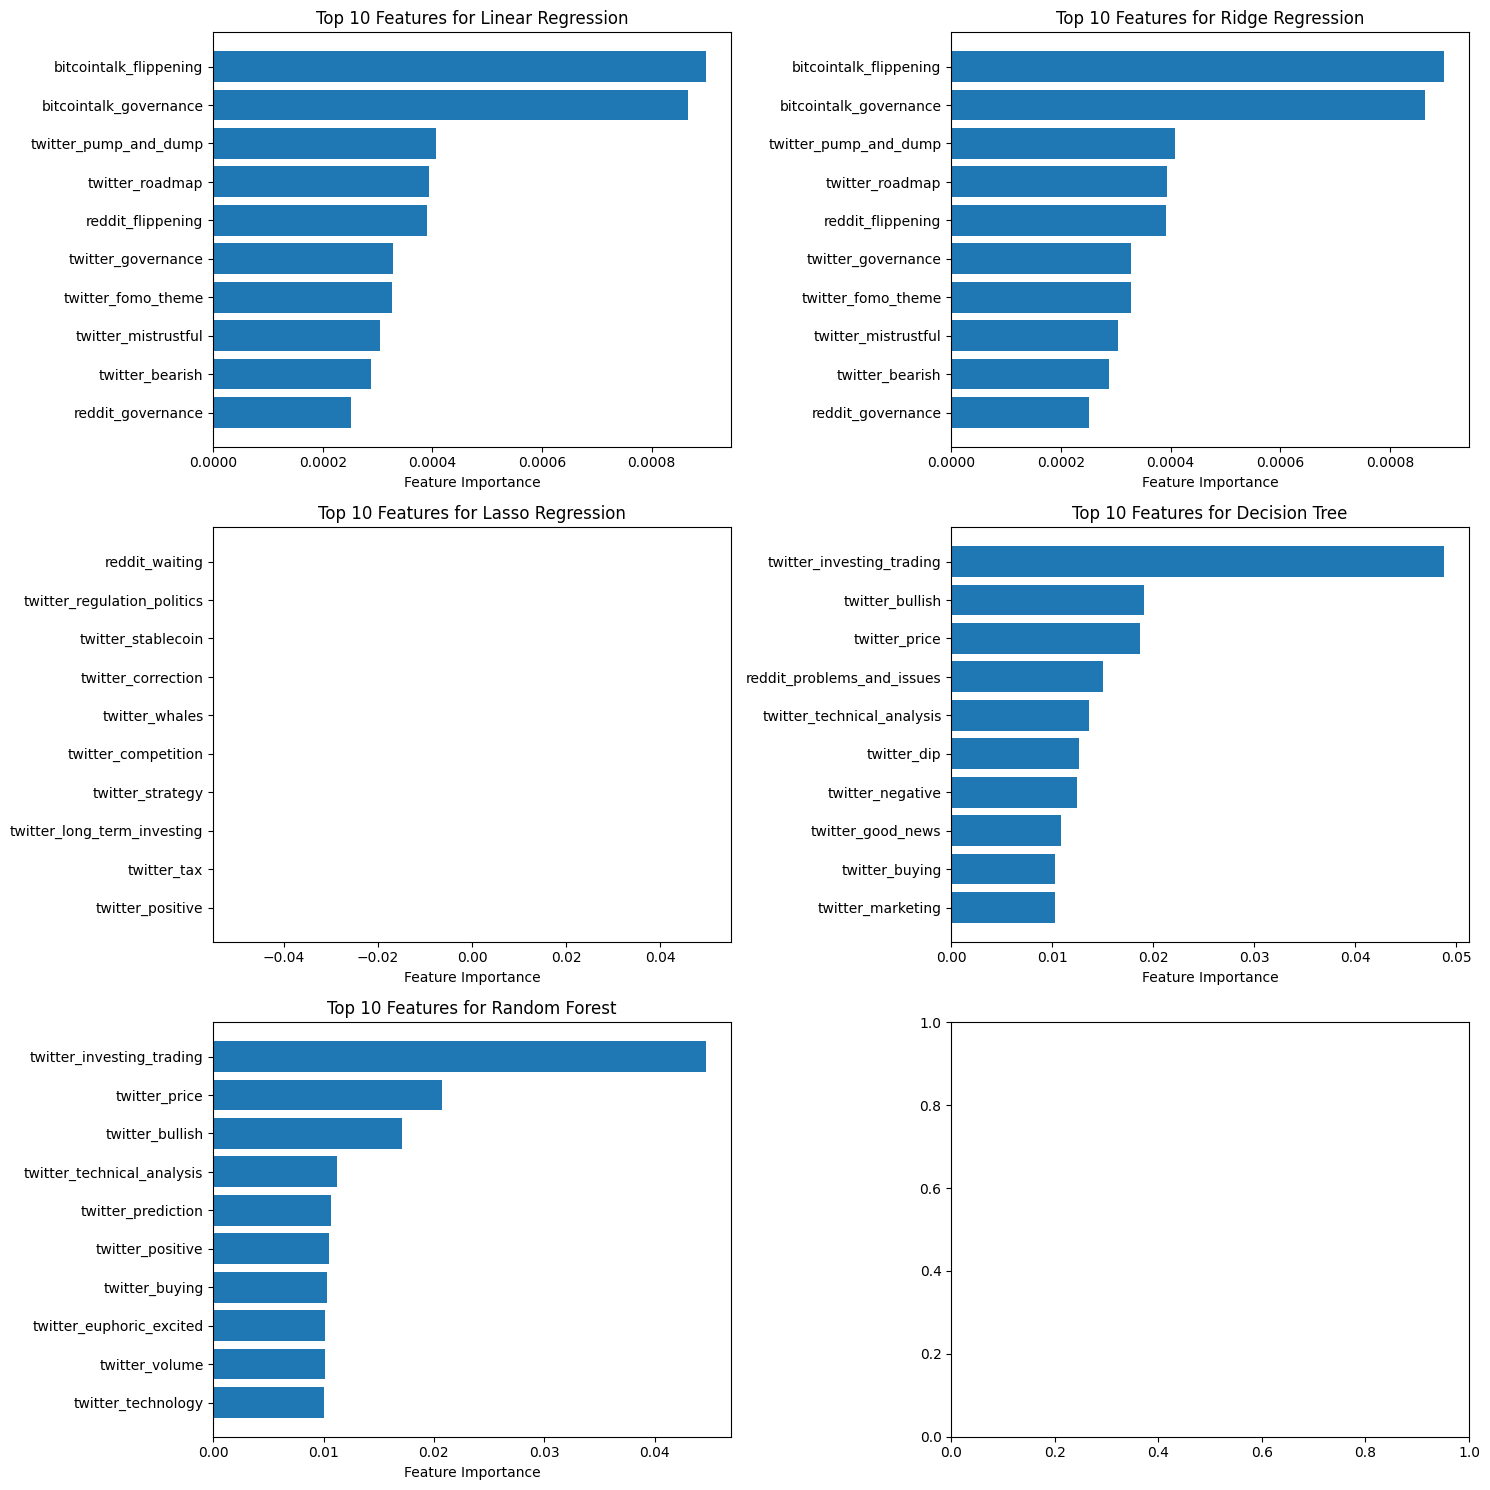

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
df = pd.read_excel("/content/augmento_btc_returns.xlsx")

# Select the features and target variable
features = [
    'twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling',
    'twitter_market_manipulation', 'twitter_de_centralisation', 'twitter_angry', 'twitter_etf',
    'twitter_leverage', 'twitter_bottom', 'twitter_institutional_money', 'twitter_fomo',
    'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned', 'twitter_portfolio',
    'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis',
    'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited',
    'twitter_hodling', 'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain',
    'twitter_volume', 'twitter_risk', 'twitter_governance', 'twitter_ban', 'twitter_cheap',
    'twitter_short_term_trading', 'twitter_fork', 'twitter_progress', 'twitter_shilling',
    'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful',
    'twitter_bug', 'twitter_open_source', 'twitter_token_economics', 'twitter_security',
    'twitter_marketing', 'twitter_bad_news', 'twitter_due_diligence', 'twitter_team',
    'twitter_partnerships', 'twitter_pump_and_dump', 'twitter_sad', 'twitter_panicking',
    'twitter_listing', 'twitter_regulation_politics', 'twitter_dip', 'twitter_launch',
    'twitter_fomo_theme', 'twitter_advice_support', 'twitter_rebranding', 'twitter_wallet',
    'twitter_good_news', 'twitter_problems_and_issues', 'twitter_mining', 'twitter_waiting',
    'twitter_learning', 'twitter_scaling', 'twitter_fees', 'twitter_roadmap', 'twitter_recovery',
    'twitter_technology', 'twitter_mistrustful', 'twitter_marketcap', 'twitter_positive',
    'twitter_tax', 'twitter_long_term_investing', 'twitter_strategy', 'twitter_competition',
    'twitter_whales', 'twitter_correction', 'twitter_stablecoin', 'twitter_buying', 'twitter_warning',
    'twitter_annoyed_frustrated', 'twitter_price', 'twitter_use_case_applications', 'twitter_rumor',
    'twitter_scam_fraud', 'twitter_airdrop', 'twitter_optimistic', 'twitter_negative',
    'bitcointalk_hacks', 'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks', 'bitcointalk_selling',
    'bitcointalk_market_manipulation', 'bitcointalk_de_centralisation', 'bitcointalk_angry',
    'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom', 'bitcointalk_institutional_money',
    'bitcointalk_fomo', 'bitcointalk_prediction', 'bitcointalk_adoption', 'bitcointalk_fearful_concerned',
    'bitcointalk_portfolio', 'bitcointalk_fud_theme', 'bitcointalk_whitepaper', 'bitcointalk_announcements',
    'bitcointalk_technical_analysis', 'bitcointalk_flippening', 'bitcointalk_community',
    'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited', 'bitcointalk_hodling',
    'bitcointalk_ico', 'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain',
    'bitcointalk_volume', 'bitcointalk_risk', 'bitcointalk_governance', 'bitcointalk_ban',
    'bitcointalk_cheap', 'bitcointalk_short_term_trading', 'bitcointalk_fork', 'bitcointalk_progress',
    'bitcointalk_shilling', 'bitcointalk_bullish', 'bitcointalk_happy', 'bitcointalk_bubble',
    'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug', 'bitcointalk_open_source',
    'bitcointalk_token_economics', 'bitcointalk_security', 'bitcointalk_marketing',
    'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team', 'bitcointalk_partnerships',
    'bitcointalk_pump_and_dump', 'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing',
    'bitcointalk_regulation_politics', 'bitcointalk_dip', 'bitcointalk_launch', 'bitcointalk_fomo_theme',
    'bitcointalk_advice_support', 'bitcointalk_rebranding', 'bitcointalk_wallet', 'bitcointalk_good_news',
    'bitcointalk_problems_and_issues', 'bitcointalk_mining', 'bitcointalk_waiting', 'reddit_hacks',
    'reddit_pessimistic_doubtful', 'reddit_banks', 'reddit_selling', 'reddit_market_manipulation',
    'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage', 'reddit_bottom',
    'reddit_institutional_money', 'reddit_fomo', 'reddit_prediction', 'reddit_adoption',
    'reddit_fearful_concerned', 'reddit_portfolio', 'reddit_fud_theme', 'reddit_whitepaper',
    'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community',
    'reddit_investing_trading', 'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico',
    'reddit_bearish', 'reddit_going_short', 'reddit_uncertain', 'reddit_volume', 'reddit_risk',
    'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading', 'reddit_fork',
    'reddit_progress', 'reddit_shilling', 'reddit_bullish', 'reddit_happy', 'reddit_bubble',
    'reddit_bots', 'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics',
    'reddit_security', 'reddit_marketing', 'reddit_bad_news', 'reddit_due_diligence', 'reddit_team',
    'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad', 'reddit_panicking', 'reddit_listing',
    'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme', 'reddit_advice_support',
    'reddit_rebranding', 'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
    'reddit_waiting'
]
target = 'returns'

X = df[features]
y = df[target]

# Convert target column to numeric, coercing errors to NaN
y = pd.to_numeric(y, errors='coerce')

# Fill NaN values in the target column with the mean
y = y.fillna(y.mean())

# Fill NaN values in features with column means
X = X.fillna(X.mean())

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train the models and get feature importances
feature_importances = {}

for model_name, model in models.items():
    model.fit(X, y)
    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        importance = np.abs(model.coef_)
    else:
        importance = model.feature_importances_
    feature_importances[model_name] = importance

# Plot the main 10 features for each model
top_n = 10
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, (model_name, importance) in enumerate(feature_importances.items()):
    ax = axes[i // 2, i % 2]
    sorted_idx = np.argsort(importance)[-top_n:]
    y_ticks = np.arange(0, top_n)
    ax.barh(y_ticks, importance[sorted_idx], align='center')
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(np.array(features)[sorted_idx])
    ax.set_title(f'Top {top_n} Features for {model_name}')
    ax.set_xlabel('Feature Importance')

plt.tight_layout()
plt.show()


Corrected

In [28]:
try:
    df = pd.read_excel('/content/augmento_btc_returns.xlsx')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    # Optionally, try to read the file with errors handled
    df = pd.read_excel('/content/augmento_btc_returns.xlsx', error_bad_lines=False)


In [10]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Corrected custom_train_test_split function
def custom_train_test_split(df, cutoff_date, target_column_name='target', features=None):
    # Validate features
    if features is None:
        features = df.columns.tolist()  # Use all columns if features not specified
    else:
        missing_features = [f for f in features if f not in df.columns]
        if missing_features:
            raise ValueError(f"Features missing in DataFrame: {', '.join(missing_features)}.")

    # Handle NaN values
    df = df.fillna(df.mean())

    df['date'] = pd.to_datetime(df['date'])
    train_df = df[df['date'] <= cutoff_date]
    test_df = df[df['date'] > cutoff_date]

    X_train = train_df[features]
    y_train = train_df[target_column_name]
    X_test = test_df[features]
    y_test = test_df[target_column_name]

    return X_train, y_train, X_test, y_test

# Example usage:
cutoff_date = pd.to_datetime('2023-01-01')
target_column = 'target'
features = ['twitter_hacks', 'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling', 'twitter_market_manipulation',
    'twitter_de_centralisation', 'twitter_angry', 'twitter_etf', 'twitter_leverage', 'twitter_bottom',
    'twitter_institutional_money', 'twitter_fomo', 'twitter_prediction', 'twitter_adoption', 'twitter_fearful_concerned',
    'twitter_portfolio', 'twitter_fud_theme', 'twitter_whitepaper', 'twitter_announcements', 'twitter_technical_analysis',
    'twitter_flippening', 'twitter_community', 'twitter_investing_trading', 'twitter_euphoric_excited', 'twitter_hodling',
    'twitter_ico', 'twitter_bearish', 'twitter_going_short', 'twitter_uncertain', 'twitter_volume', 'twitter_risk',
    'twitter_governance', 'twitter_ban', 'twitter_cheap', 'twitter_short_term_trading', 'twitter_fork', 'twitter_progress',
    'twitter_shilling', 'twitter_bullish', 'twitter_happy', 'twitter_bubble', 'twitter_bots', 'twitter_hopeful',
    'twitter_bug', 'twitter_open_source', 'twitter_token_economics', 'twitter_security', 'twitter_marketing',
    'twitter_bad_news', 'twitter_due_diligence', 'twitter_team', 'twitter_partnerships', 'twitter_pump_and_dump',
    'twitter_sad', 'twitter_panicking', 'twitter_listing', 'twitter_regulation_politics', 'twitter_dip', 'twitter_launch',
    'twitter_fomo_theme', 'twitter_advice_support', 'twitter_rebranding', 'twitter_wallet', 'twitter_good_news',
    'twitter_problems_and_issues', 'twitter_mining', 'twitter_waiting', 'twitter_learning', 'twitter_scaling', 'twitter_fees',
    'twitter_roadmap', 'twitter_recovery', 'twitter_technology', 'twitter_mistrustful', 'twitter_marketcap', 'twitter_positive',
    'twitter_tax', 'twitter_long_term_investing', 'twitter_strategy', 'twitter_competition', 'twitter_whales',
    'twitter_correction', 'twitter_stablecoin', 'twitter_buying', 'twitter_warning', 'twitter_annoyed_frustrated',
    'twitter_price', 'twitter_use_case_applications', 'twitter_rumor', 'twitter_scam_fraud', 'twitter_airdrop',
    'twitter_optimistic', 'twitter_negative', 'bitcointalk_hacks', 'bitcointalk_pessimistic_doubtful', 'bitcointalk_banks',
    'bitcointalk_selling', 'bitcointalk_market_manipulation', 'bitcointalk_de_centralisation', 'bitcointalk_angry',
    'bitcointalk_etf', 'bitcointalk_leverage', 'bitcointalk_bottom', 'bitcointalk_institutional_money', 'bitcointalk_fomo',
    'bitcointalk_prediction', 'bitcointalk_adoption', 'bitcointalk_fearful_concerned', 'bitcointalk_portfolio',
    'bitcointalk_fud_theme', 'bitcointalk_whitepaper', 'bitcointalk_announcements', 'bitcointalk_technical_analysis',
    'bitcointalk_flippening', 'bitcointalk_community', 'bitcointalk_investing_trading', 'bitcointalk_euphoric_excited',
    'bitcointalk_hodling', 'bitcointalk_ico', 'bitcointalk_bearish', 'bitcointalk_going_short', 'bitcointalk_uncertain',
    'bitcointalk_volume', 'bitcointalk_risk', 'bitcointalk_governance', 'bitcointalk_ban', 'bitcointalk_cheap',
    'bitcointalk_short_term_trading', 'bitcointalk_fork', 'bitcointalk_progress', 'bitcointalk_shilling', 'bitcointalk_bullish',
    'bitcointalk_happy', 'bitcointalk_bubble', 'bitcointalk_bots', 'bitcointalk_hopeful', 'bitcointalk_bug',
    'bitcointalk_open_source', 'bitcointalk_token_economics', 'bitcointalk_security', 'bitcointalk_marketing',
    'bitcointalk_bad_news', 'bitcointalk_due_diligence', 'bitcointalk_team', 'bitcointalk_partnerships', 'bitcointalk_pump_and_dump',
    'bitcointalk_sad', 'bitcointalk_panicking', 'bitcointalk_listing', 'bitcointalk_regulation_politics', 'bitcointalk_dip',
    'bitcointalk_launch', 'bitcointalk_fomo_theme', 'bitcointalk_advice_support', 'bitcointalk_rebranding', 'bitcointalk_wallet',
    'bitcointalk_good_news', 'bitcointalk_problems_and_issues', 'bitcointalk_mining', 'bitcointalk_waiting', 'bitcointalk_learning',
    'bitcointalk_scaling', 'bitcointalk_fees', 'bitcointalk_roadmap', 'bitcointalk_recovery', 'bitcointalk_technology',
    'bitcointalk_mistrustful', 'bitcointalk_marketcap', 'bitcointalk_positive', 'bitcointalk_tax', 'bitcointalk_long_term_investing',
    'bitcointalk_strategy', 'bitcointalk_competition', 'bitcointalk_whales', 'bitcointalk_correction', 'bitcointalk_stablecoin',
    'bitcointalk_buying', 'bitcointalk_warning', 'bitcointalk_annoyed_frustrated', 'bitcointalk_price', 'bitcointalk_use_case_applications',
    'bitcointalk_rumor', 'bitcointalk_scam_fraud', 'bitcointalk_airdrop', 'bitcointalk_optimistic', 'bitcointalk_negative',
    'reddit_hacks', 'reddit_pessimistic_doubtful', 'reddit_banks', 'reddit_selling', 'reddit_market_manipulation',
    'reddit_de_centralisation', 'reddit_angry', 'reddit_etf', 'reddit_leverage', 'reddit_bottom', 'reddit_institutional_money',
    'reddit_fomo', 'reddit_prediction', 'reddit_adoption', 'reddit_fearful_concerned', 'reddit_portfolio', 'reddit_fud_theme',
    'reddit_whitepaper', 'reddit_announcements', 'reddit_technical_analysis', 'reddit_flippening', 'reddit_community',
    'reddit_investing_trading', 'reddit_euphoric_excited', 'reddit_hodling', 'reddit_ico', 'reddit_bearish', 'reddit_going_short',
    'reddit_uncertain', 'reddit_volume', 'reddit_risk', 'reddit_governance', 'reddit_ban', 'reddit_cheap', 'reddit_short_term_trading',
    'reddit_fork', 'reddit_progress', 'reddit_shilling', 'reddit_bullish', 'reddit_happy', 'reddit_bubble', 'reddit_bots',
    'reddit_hopeful', 'reddit_bug', 'reddit_open_source', 'reddit_token_economics', 'reddit_security', 'reddit_marketing',
    'reddit_bad_news', 'reddit_due_diligence', 'reddit_team', 'reddit_partnerships', 'reddit_pump_and_dump', 'reddit_sad',
    'reddit_panicking', 'reddit_listing', 'reddit_regulation_politics', 'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
    'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet', 'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
    'reddit_waiting', 'reddit_learning', 'reddit_scaling', 'reddit_fees', 'reddit_roadmap', 'reddit_recovery', 'reddit_technology',
    'reddit_mistrustful', 'reddit_marketcap', 'reddit_positive', 'reddit_tax', 'reddit_long_term_investing', 'reddit_strategy',
    'reddit_competition', 'reddit_whales', 'reddit_correction', 'reddit_stablecoin', 'reddit_buying', 'reddit_warning',
    'reddit_annoyed_frustrated', 'reddit_price', 'reddit_use_case_applications', 'reddit_rumor', 'reddit_scam_fraud',
    'reddit_airdrop', 'reddit_optimistic', 'reddit_negative']

# Load your DataFrame (assuming 'data.csv' has been pre-loaded)
df = pd.read_excel('/content/augmento_btc_returns.xlsx')

# Ensure the 'date' column is parsed as dates
df['date'] = pd.to_datetime(df['date'])

# Perform the split
X_train, y_train, X_test, y_test = custom_train_test_split(df, cutoff_date, target_column, features)

# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")


ValueError: Features missing in DataFrame: reddit_learning, reddit_scaling, reddit_fees, reddit_roadmap, reddit_recovery, reddit_technology, reddit_mistrustful, reddit_marketcap, reddit_positive, reddit_tax, reddit_long_term_investing, reddit_strategy, reddit_competition, reddit_whales, reddit_correction, reddit_stablecoin, reddit_buying, reddit_warning, reddit_annoyed_frustrated, reddit_price, reddit_use_case_applications, reddit_rumor, reddit_scam_fraud, reddit_airdrop, reddit_optimistic, reddit_negative.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Function to clean and prepare data
def clean_data(df):
    print("Initial data preview:")
    print(df.head())

    # Replace non-numeric error strings with NaN
    df = df.replace('Err:502', np.nan)
    print("\nData after replacing 'Err:502' with NaN:")
    print(df.head())

    # Ensure 'date' column is parsed correctly
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("\nData after date conversion:")
    print(df.head())

    # Drop rows with any NaN values
    df = df.dropna()
    print("\nData after dropping rows with NaN values:")
    print(df.head())

    return df

# Function to split data into train and test sets
def custom_train_test_split(df, cutoff_date, target_column_name='returns', features=None):
    if features is None:
        features = df.columns.tolist()

    # Ensure 'date' column is present
    if 'date' not in df.columns:
        raise KeyError("Column 'date' not found in DataFrame.")

    train_df = df[df['date'] <= cutoff_date]
    test_df = df[df['date'] > cutoff_date]

    X_train = train_df[features].drop(columns=['date'])  # Exclude 'date' column for now
    y_train = train_df[target_column_name]
    X_test = test_df[features].drop(columns=['date'])   # Exclude 'date' column for now
    y_test = test_df[target_column_name]

    return X_train, y_train, X_test, y_test

# Load your DataFrame
df = pd.read_excel('/content/augmento_btc_returns.xlsx')

# Print initial data range for verification
print(f"Initial data range: {df['date'].min()} to {df['date'].max()}")

# Clean data
df_clean = clean_data(df)

# Print cleaned data range for verification
print(f"\nCleaned data range: {df_clean['date'].min()} to {df_clean['date'].max()}")

# Adjust 'target_column' according to the actual column name in your DataFrame
target_column = 'returns'  # Replace with actual target column name

# Example usage:
cutoff_date = pd.to_datetime('2023-01-01')
features = df_clean.columns.tolist()  # Use all numeric columns

# Perform the split
X_train, y_train, X_test, y_test = custom_train_test_split(df_clean, cutoff_date, target_column, features)

# Print number of samples in training and testing sets
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of testing samples: {X_test.shape[0]}')

# If the training set is empty, check the cutoff date and data range
if X_train.shape[0] == 0:
    print(f"Check the cutoff date and data range.")
    print(f"Data range: {df_clean['date'].min()} to {df_clean['date'].max()}")
    print(f"Cutoff date: {cutoff_date}")

# Normalization
if X_train.shape[0] > 0:  # Proceed only if training set is not empty
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert target arrays to numpy arrays and ensure correct data type
    y_train = np.array(y_train, dtype=np.float32)
    y_test = np.array(y_test, dtype=np.float32)

    # Reshape input to be 3D for LSTM [samples, timesteps, features]
    X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Print data types for verification
    print(f"X_train_scaled dtype: {X_train_scaled.dtype}")
    print(f"y_train dtype: {y_train.dtype}")
    print(f"X_test_scaled dtype: {X_test_scaled.dtype}")
    print(f"y_test dtype: {y_test.dtype}")

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)

    # Evaluate the model
    predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    print(f'Mean Squared Error: {mse}')
else:
    print("Training set is empty. Please adjust the cutoff date or check the data.")


Initial data range: 2016-11-01 01:00:00 to 2024-04-23 15:00:00
Initial data preview:
                  date  listing_close   returns  twitter_hacks  \
0  2016-11-01 01:00:00         706.00       NaN              0   
1  2016-11-01 02:00:00         709.99 -0.005636              1   
2  2016-11-01 03:00:00         708.54  0.002044              0   
3  2016-11-01 04:00:00         702.85  0.008063              0   
4  2016-11-01 05:00:00         708.50 -0.008007              0   

   twitter_pessimistic_doubtful  twitter_banks  twitter_selling  \
0                             0              0                1   
1                             0              0                1   
2                             0              0                0   
3                             0              1                0   
4                             0              0                0   

   twitter_market_manipulation  twitter_de_centralisation  twitter_angry  ...  \
0                            0    